<a href="https://colab.research.google.com/github/Muda-Ahmed/Toronto-Collision-Analysis/blob/main/CIND820_Toronto_Collision_Analysis_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Start by Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
data = pd.read_csv('/content/Killed_Seriously_Injured_Data_2017to2023.csv')

#Display the first and last few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("Last 5 rows of the dataset:")
print(data.tail())

First 5 rows of the dataset:
   OBJECTID     INDEX  ACCNUM                  DATE  TIME             STREET1  \
0     13239  80734609     NaN  1/1/2017 10:00:00 AM  1405      57 BIMINI CRES   
1     13240  80890115     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
2     13241  80890116     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
3     13242  80890117     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
4     13243  80890118     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   

       STREET2        OFFSET ROAD_CLASS        DISTRICT  ...  REDLIGHT  \
0          NaN  9 m South of      Local  Etobicoke York  ...       NaN   
1  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
2  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
3  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
4  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   

   ALCOHOL DISABILITY HOOD_158 NEIGHBOU

In [4]:
#Numerical and Categorical variables
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

#Find out each data type
print(data.dtypes)

Numeric Columns: ['OBJECTID', 'INDEX', 'ACCNUM', 'TIME', 'LATITUDE', 'LONGITUDE', 'FATAL_NO', 'x', 'y']
Categorical Columns: ['DATE', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION']
OBJECTID               int64
INDEX                  int64
ACCNUM               float64
DATE                  object
TIME                   int64
STREET1               object
STREET2               object
OFFSET                object
ROAD_CLASS            object
DISTRICT              object
LATITUDE             float64
LONGITUDE

In [5]:
#Descriptive Statistics for Numeric Variables
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

#Descriptive Statistics for Categorical Variables
print("\nDescriptive Statistics for Categorical Variables:")
print(data.describe(include=['object', 'category']))


Descriptive Statistics for Numeric Variables:
           OBJECTID         INDEX        ACCNUM        TIME     LATITUDE  \
count   5719.000000  5.719000e+03  2.728000e+03  5719.00000  5719.000000   
mean   16098.000000  8.132120e+07  1.544527e+09  1411.94597    43.710891   
std     1651.077426  3.425122e+05  1.110744e+09   635.18929     0.056949   
min    13239.000000  8.060932e+07  2.530100e+04     0.00000    43.589678   
25%    14668.500000  8.094899e+07  1.000186e+09  1000.00000    43.660609   
50%    16098.000000  8.143272e+07  2.000400e+09  1532.00000    43.704878   
75%    17527.500000  8.163160e+07  3.000047e+09  1914.50000    43.756827   
max    18957.000000  8.180752e+07  4.000062e+09  2359.00000    43.847045   

         LONGITUDE    FATAL_NO             x             y  
count  5719.000000  390.000000    5719.00000  5.719000e+03  
mean    -79.397082   28.835897  629132.40734  4.841016e+06  
std       0.106273   17.350277    8506.40571  6.400451e+03  
min     -79.621974    1.0

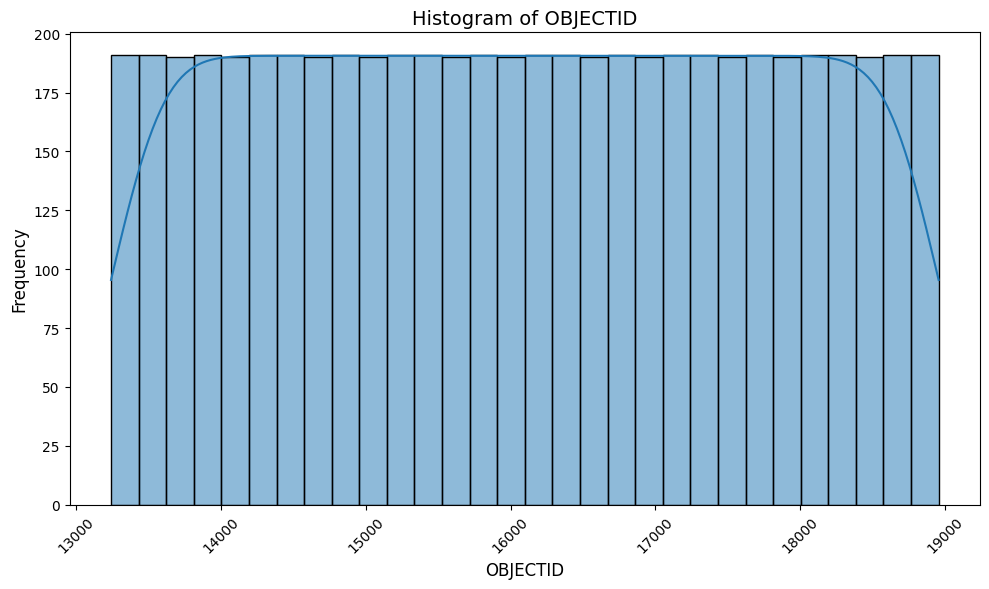

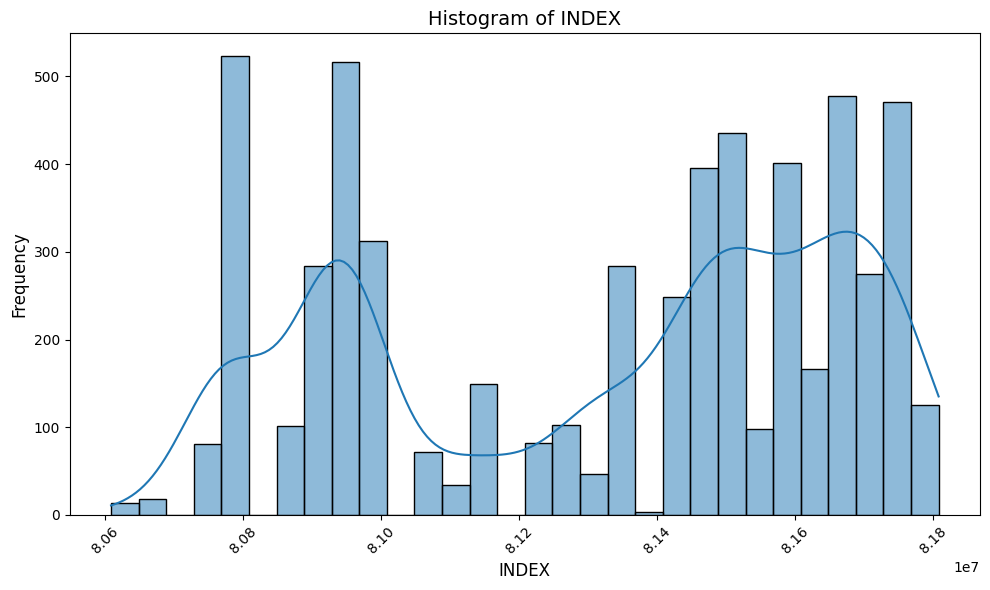

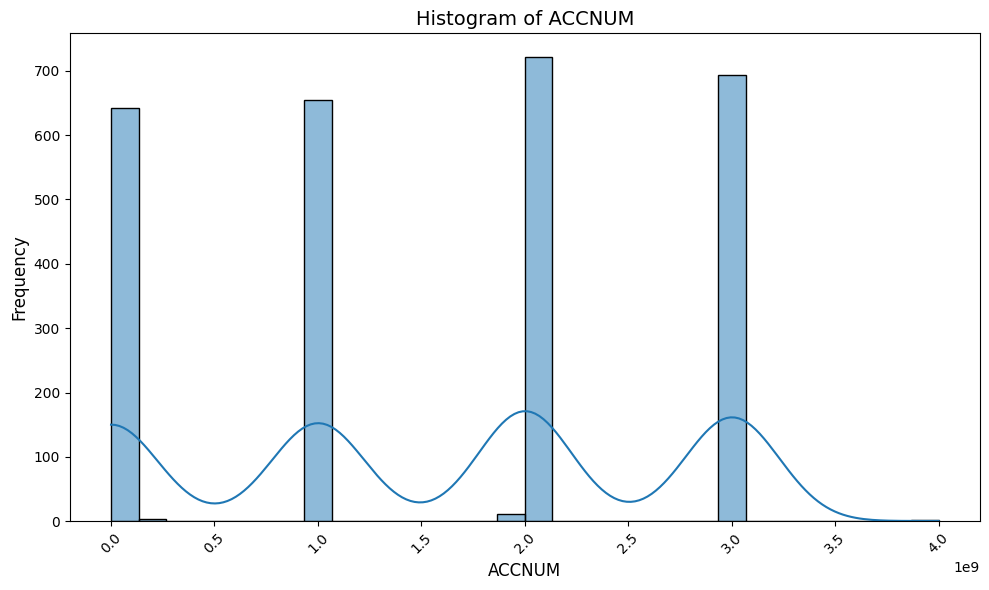

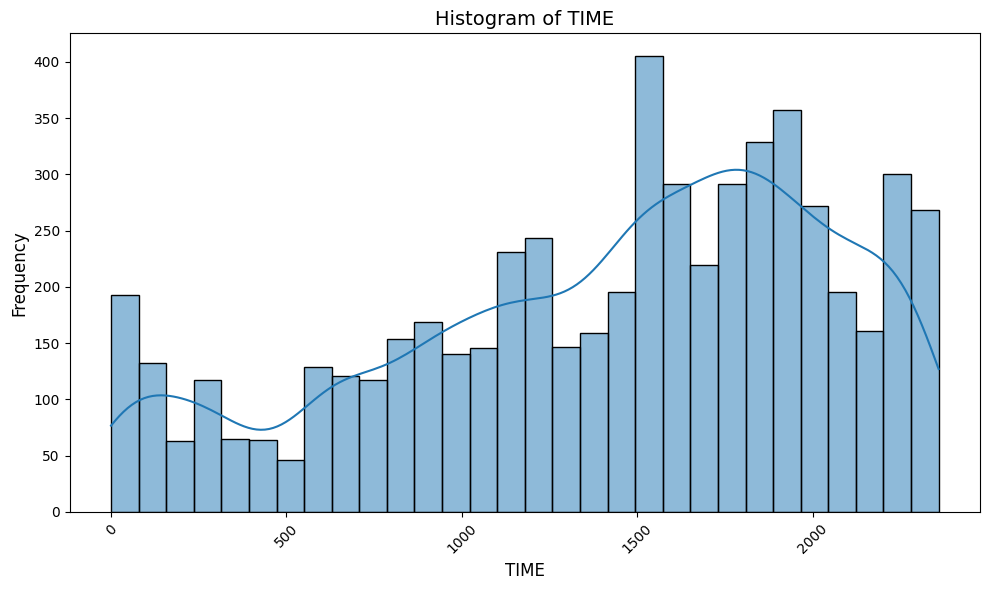

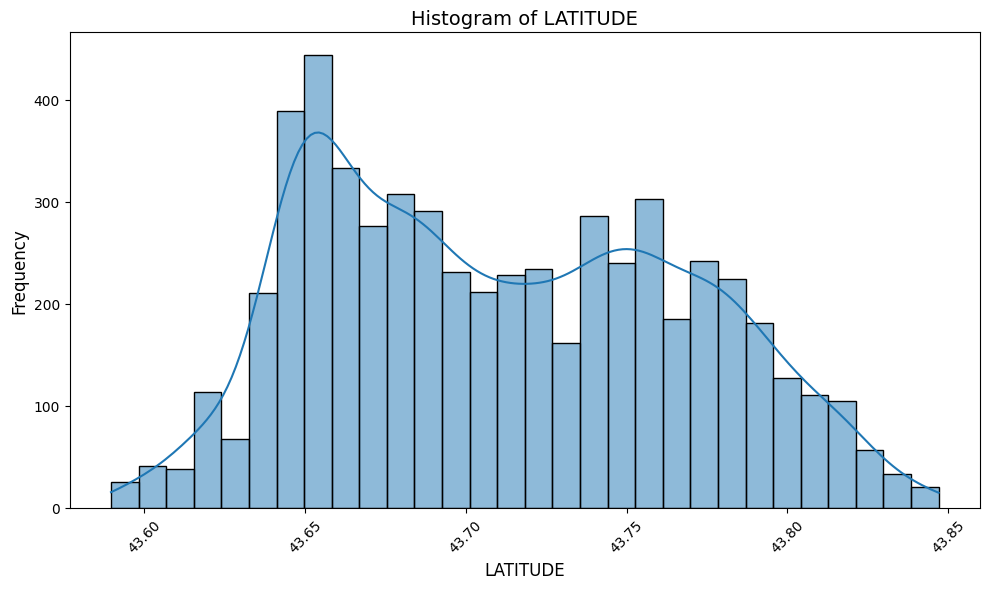

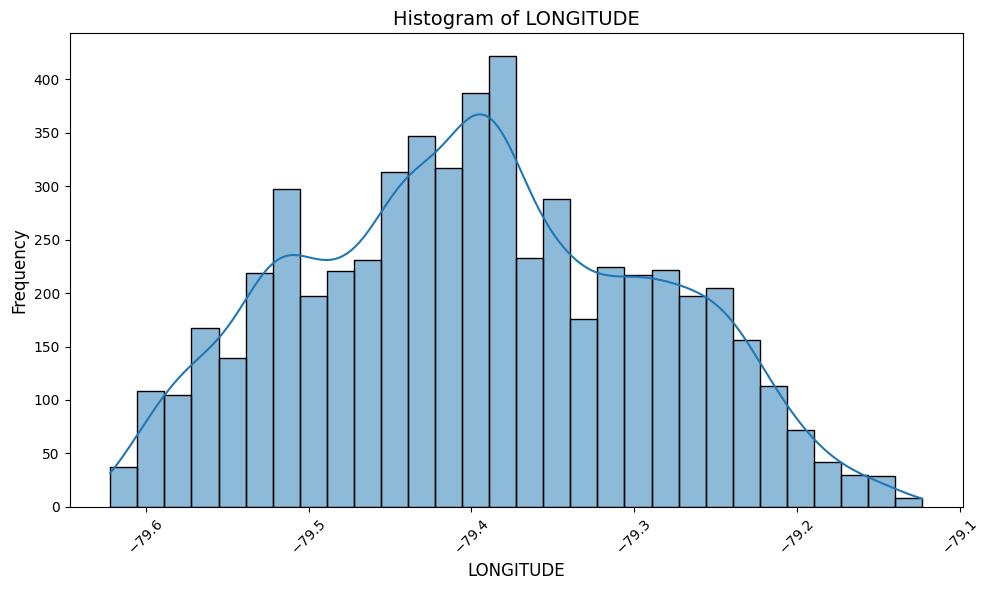

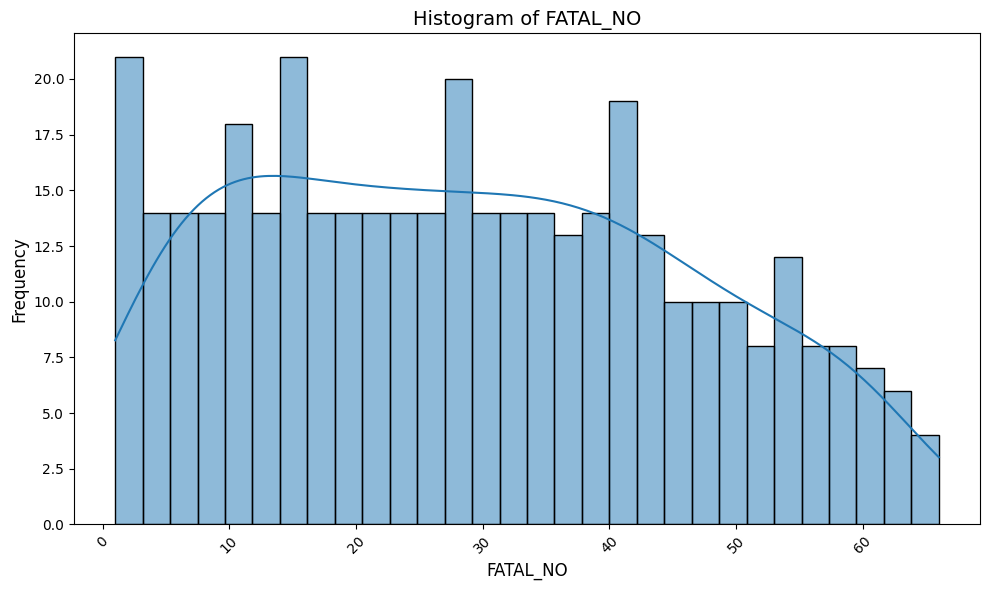

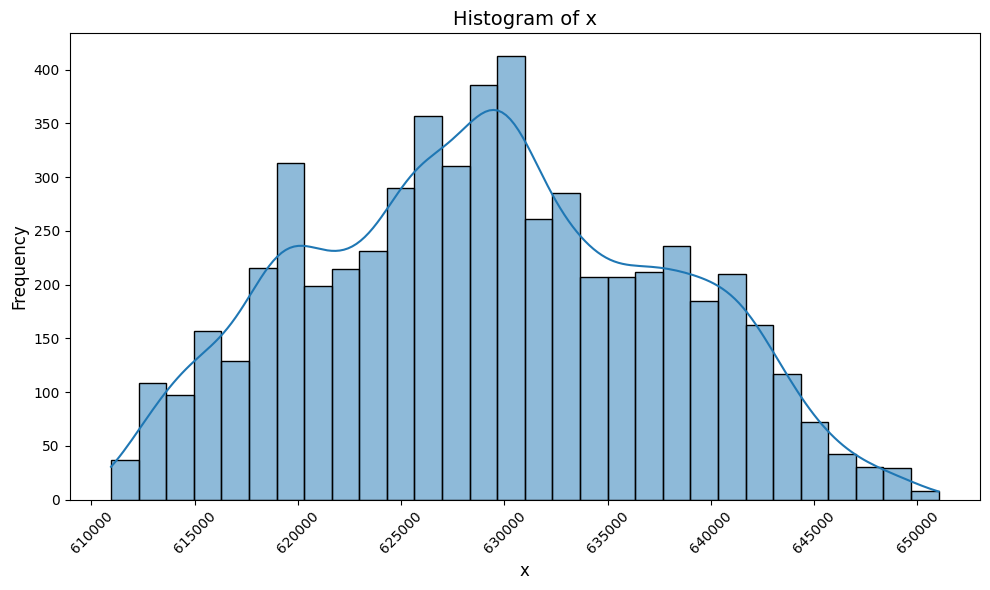

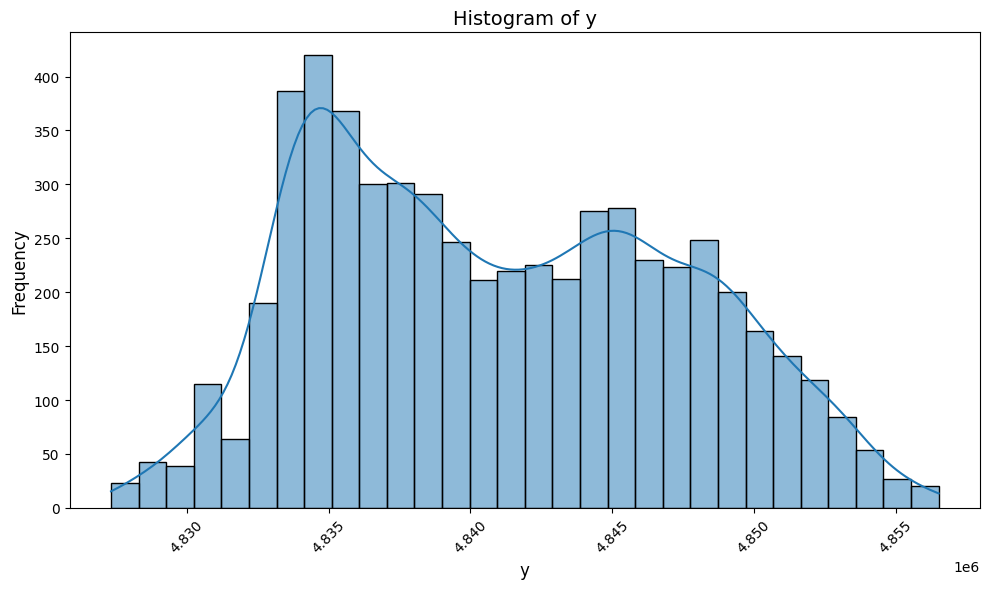

In [6]:
#Plot Histograms for Numeric Variables
numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int8']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10, rotation=45)  #Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

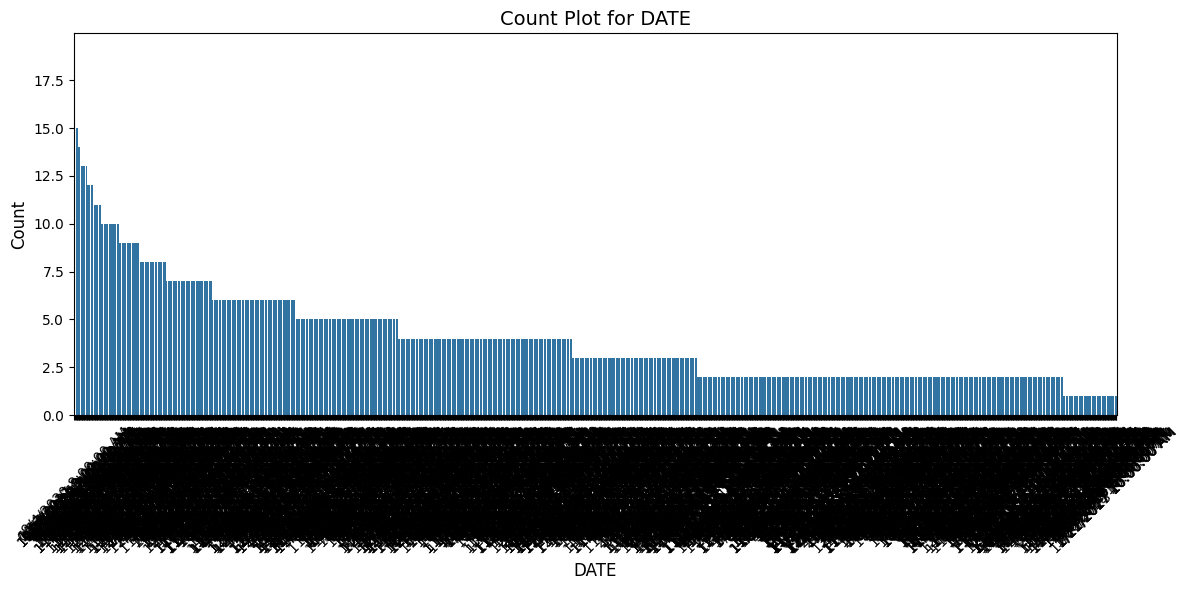

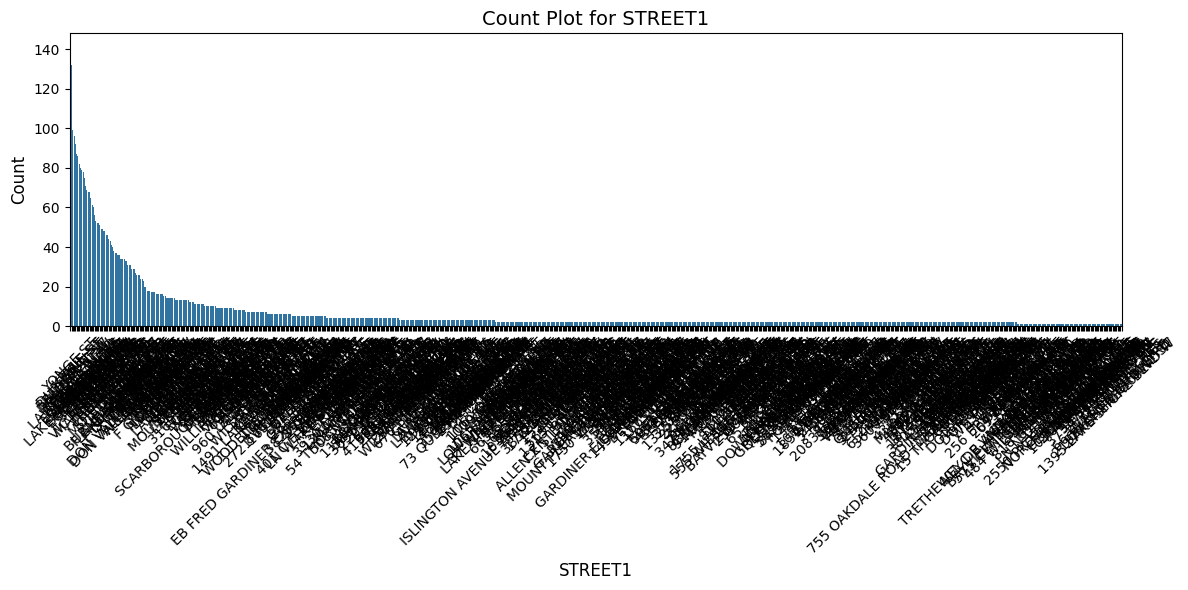

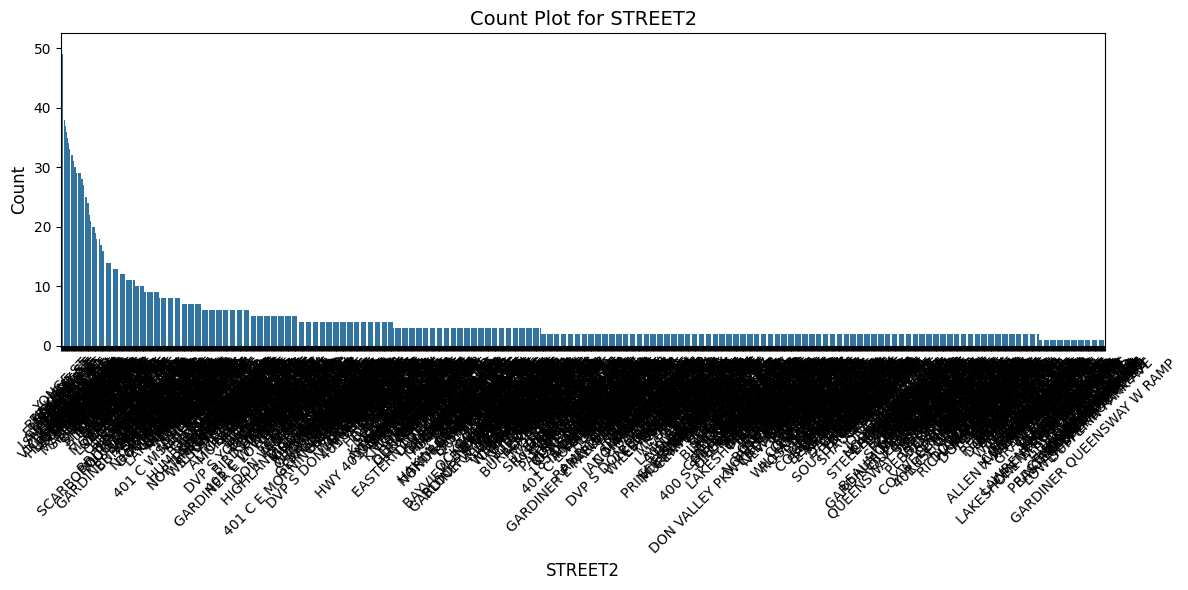

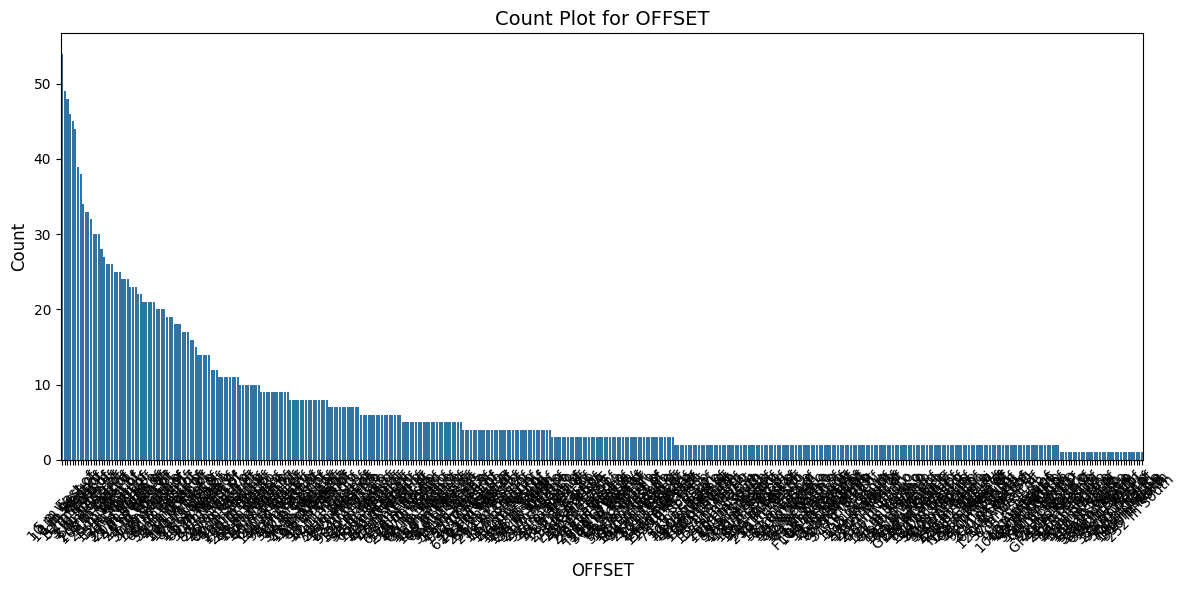

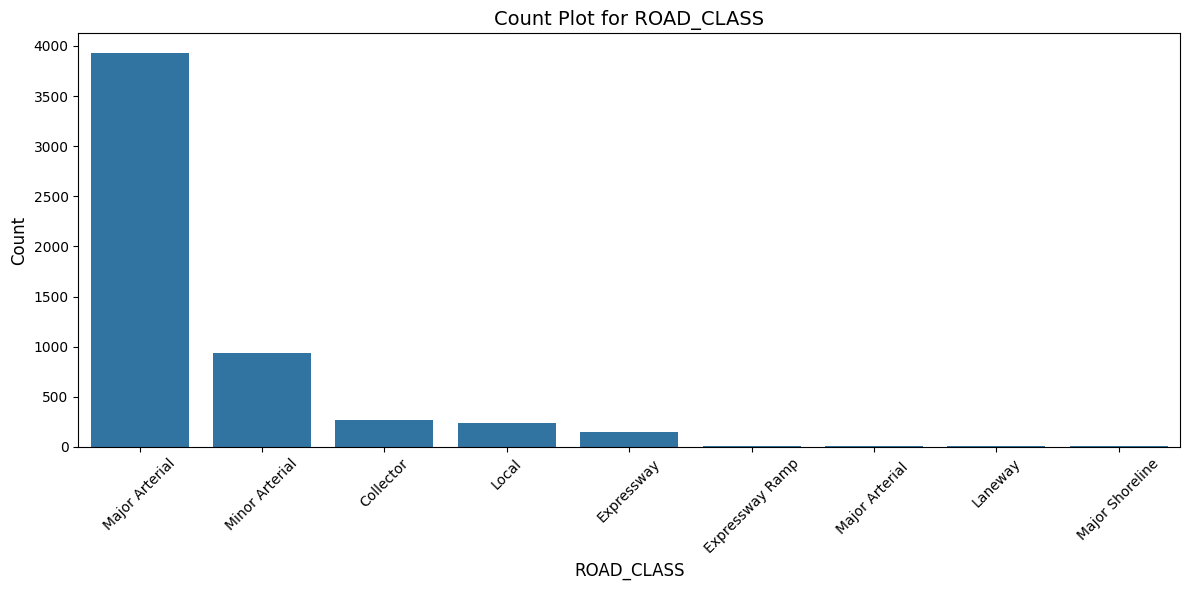

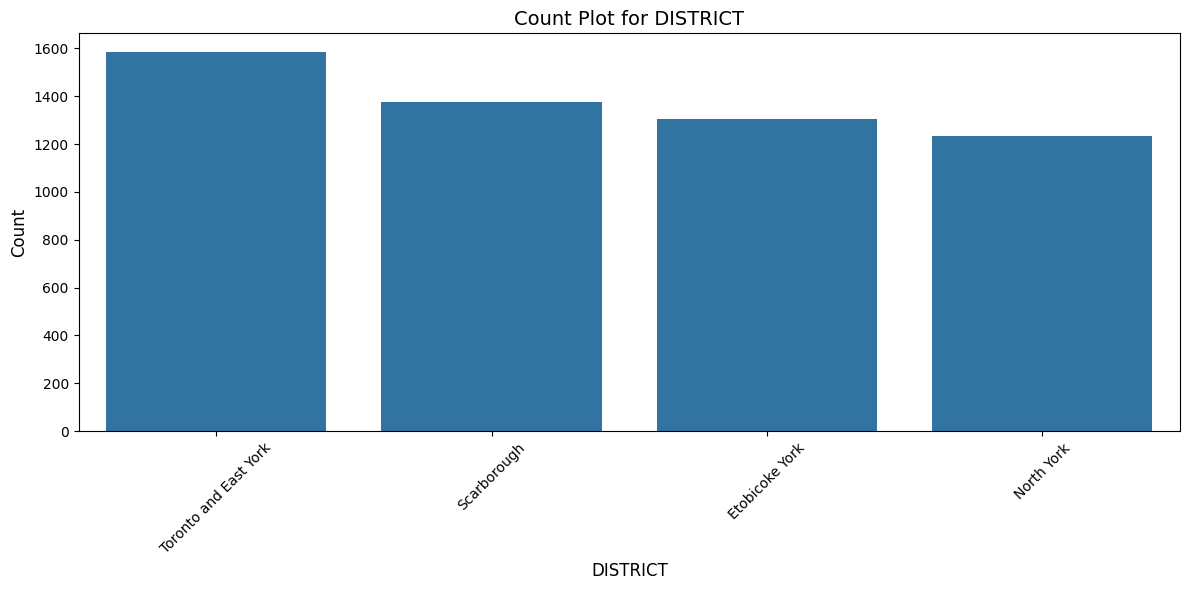

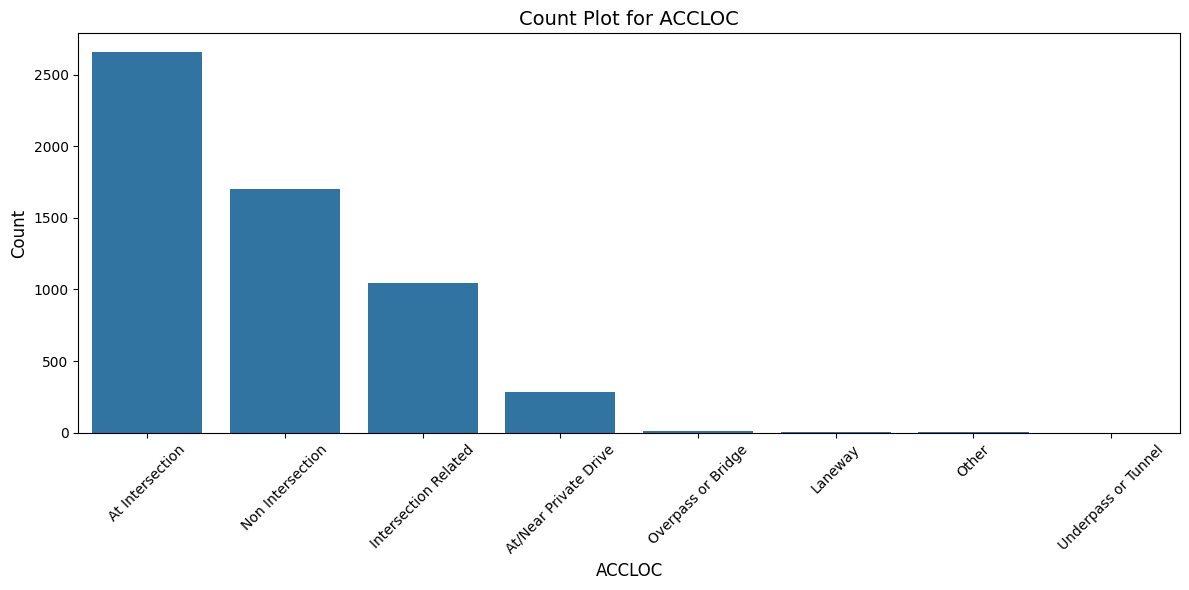

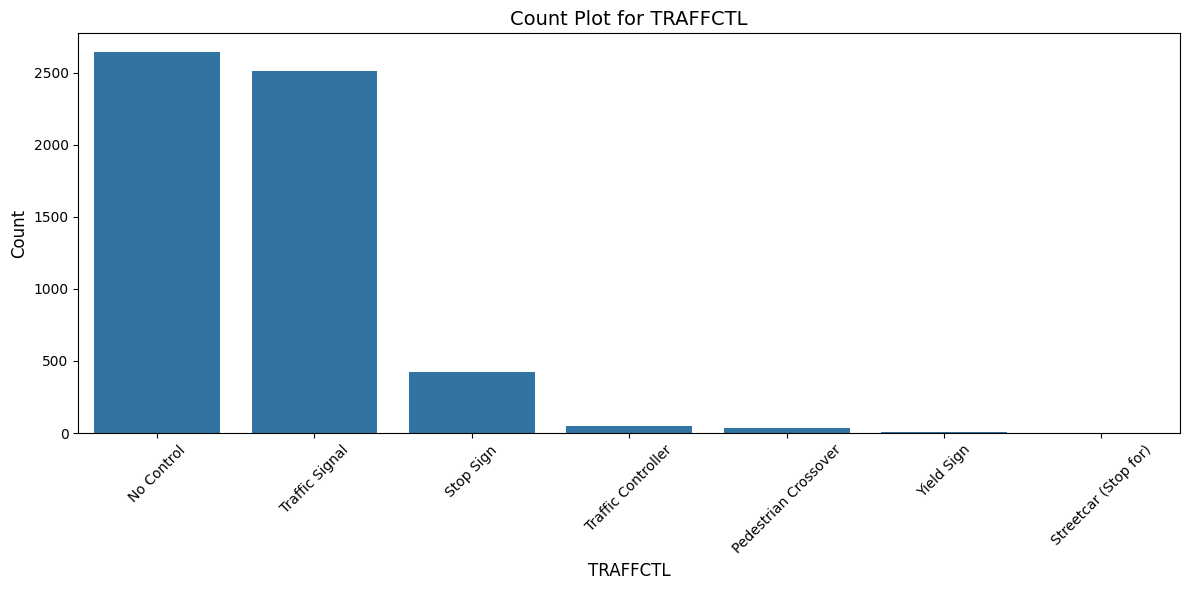

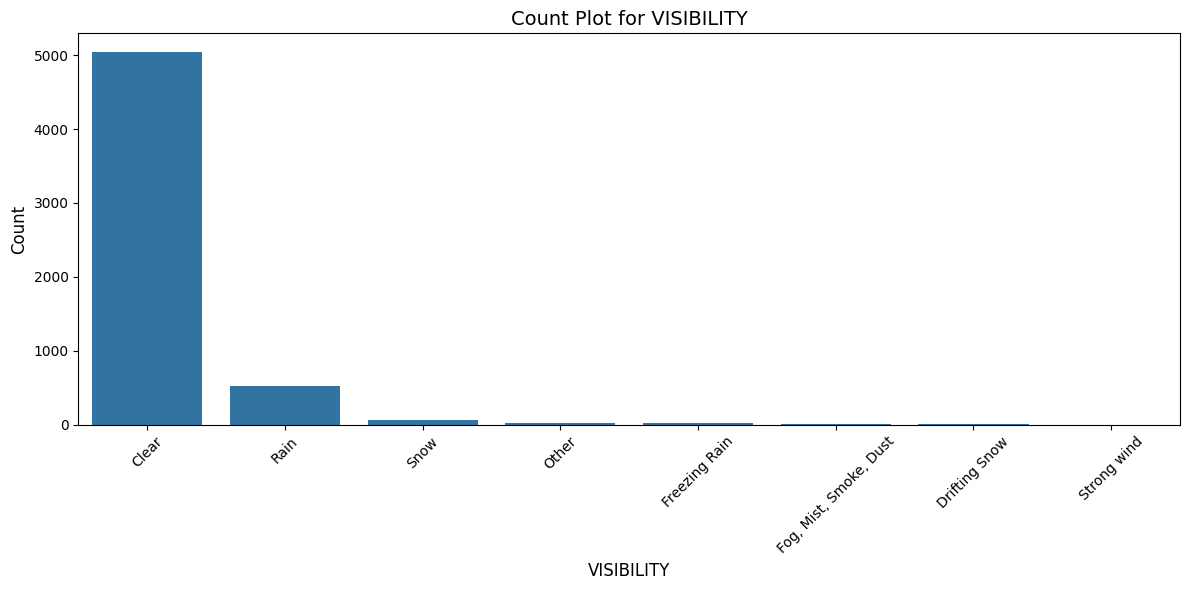

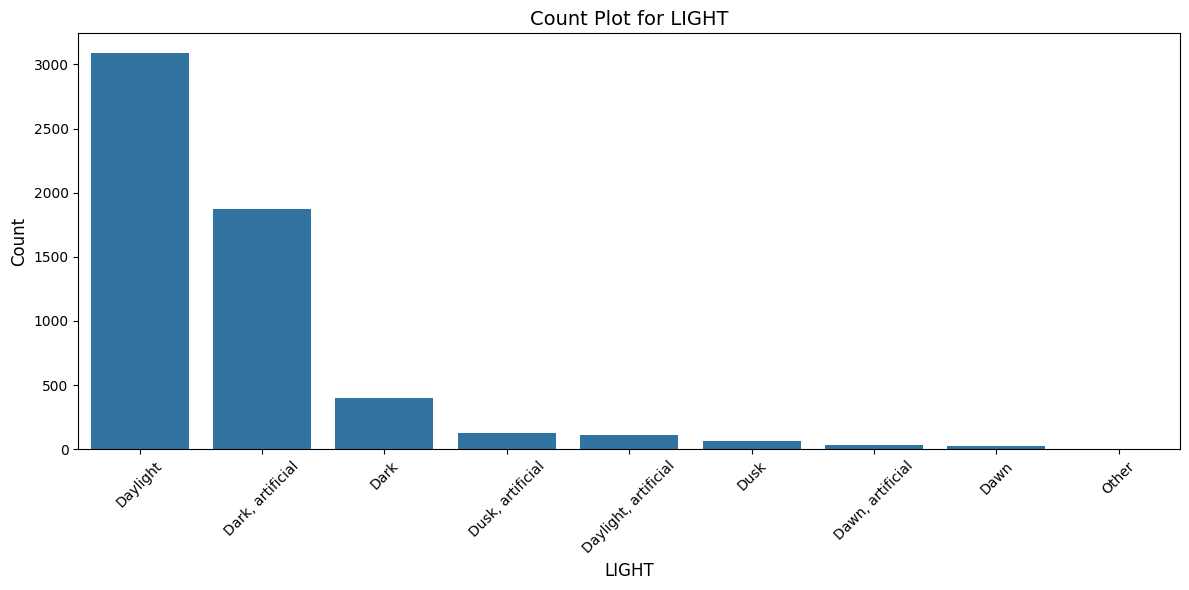

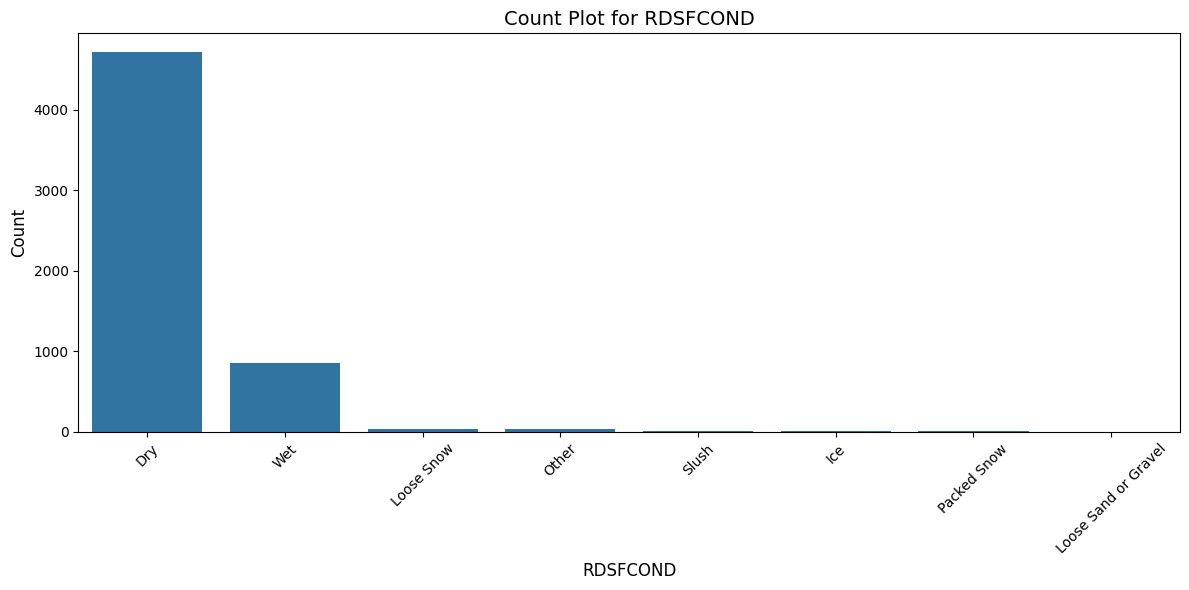

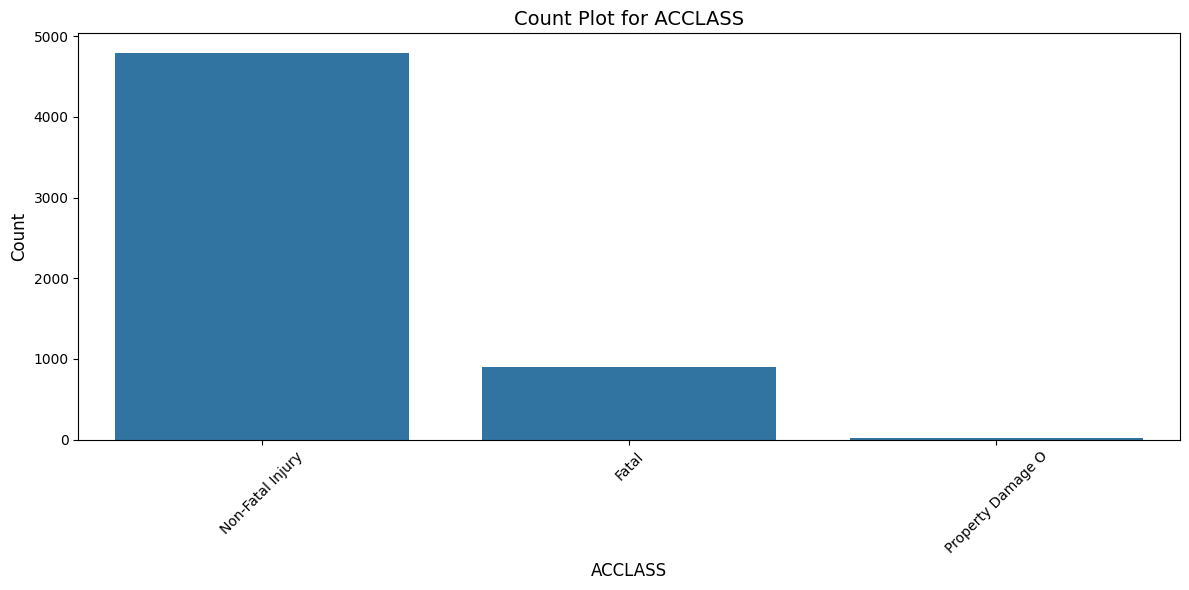

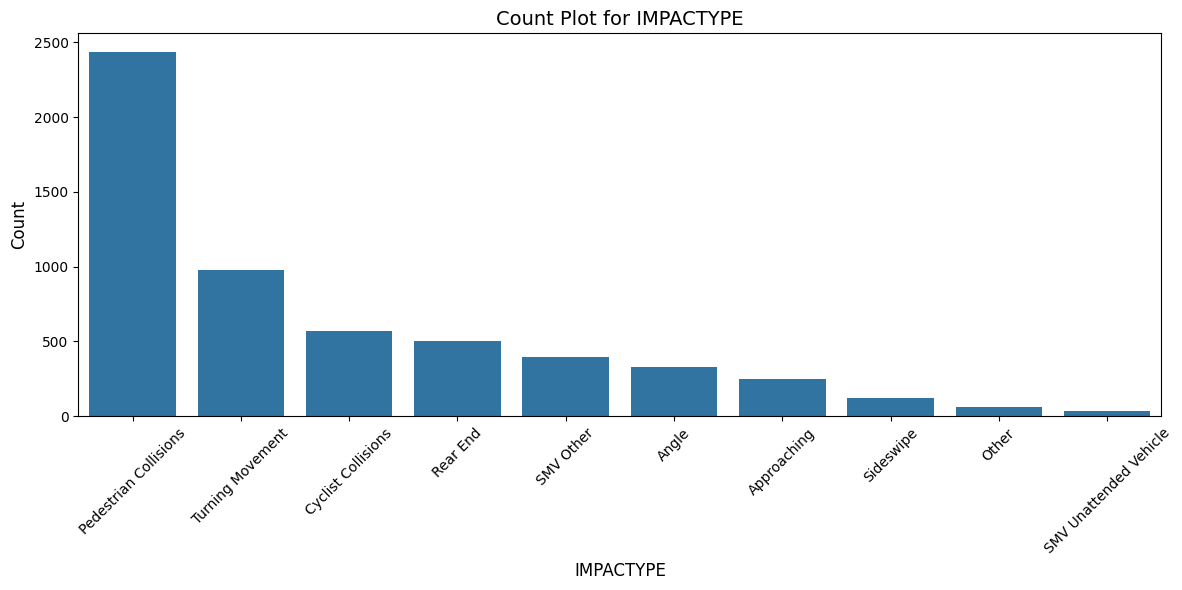

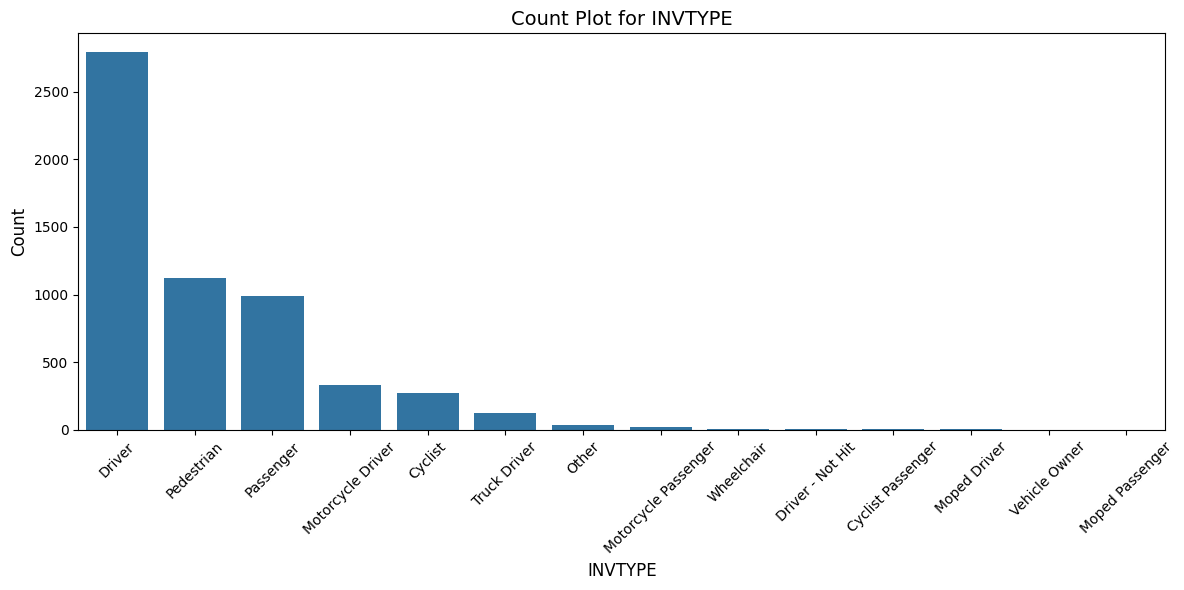

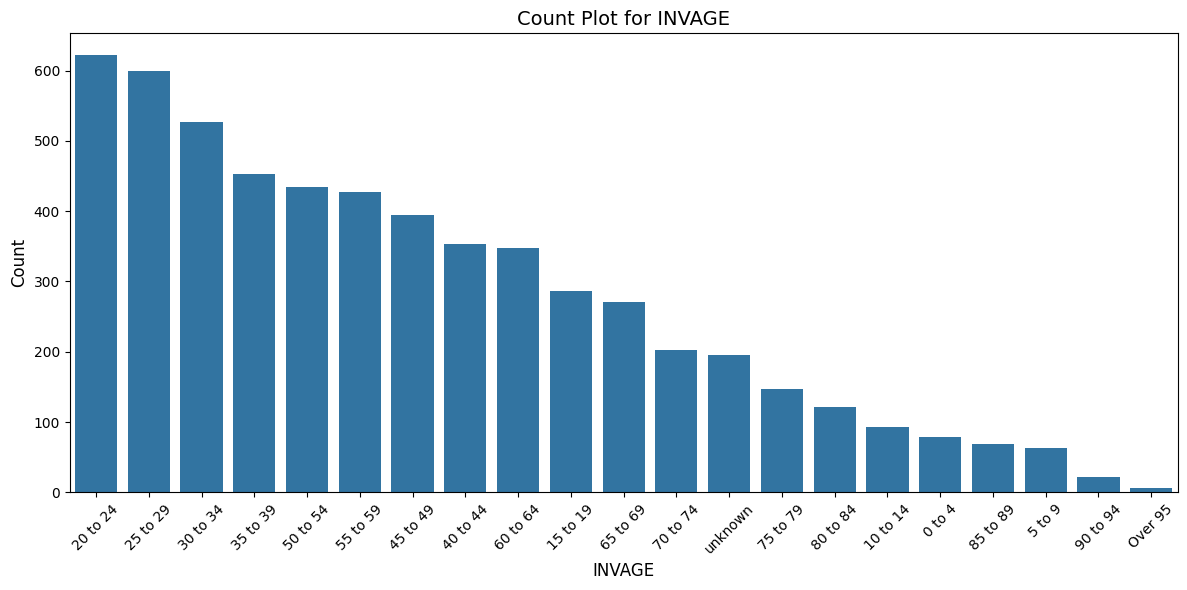

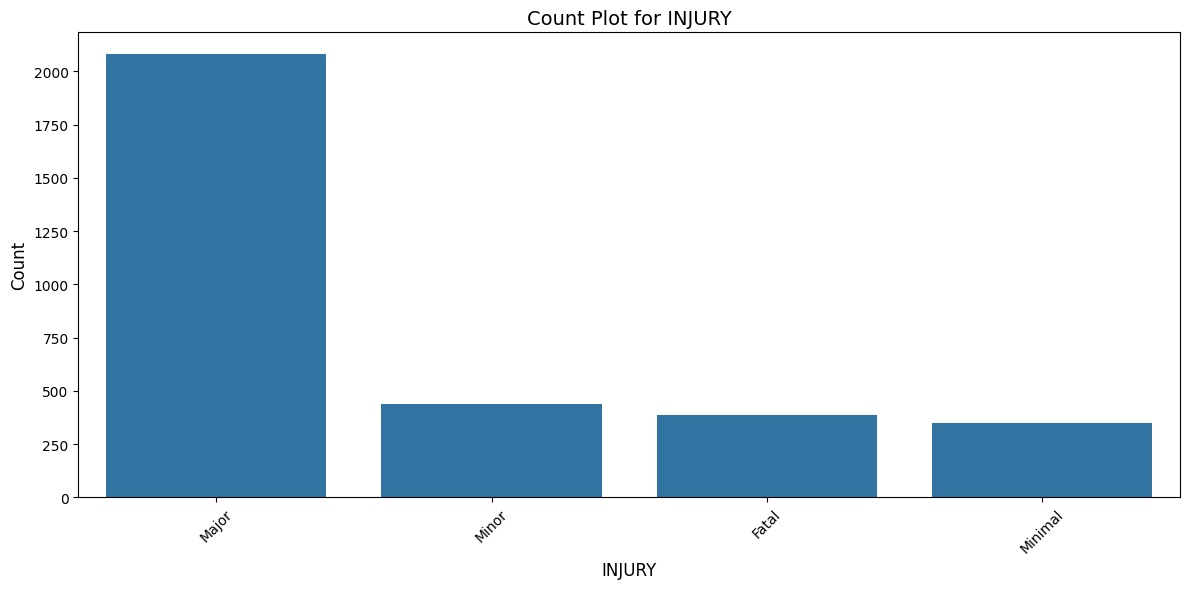

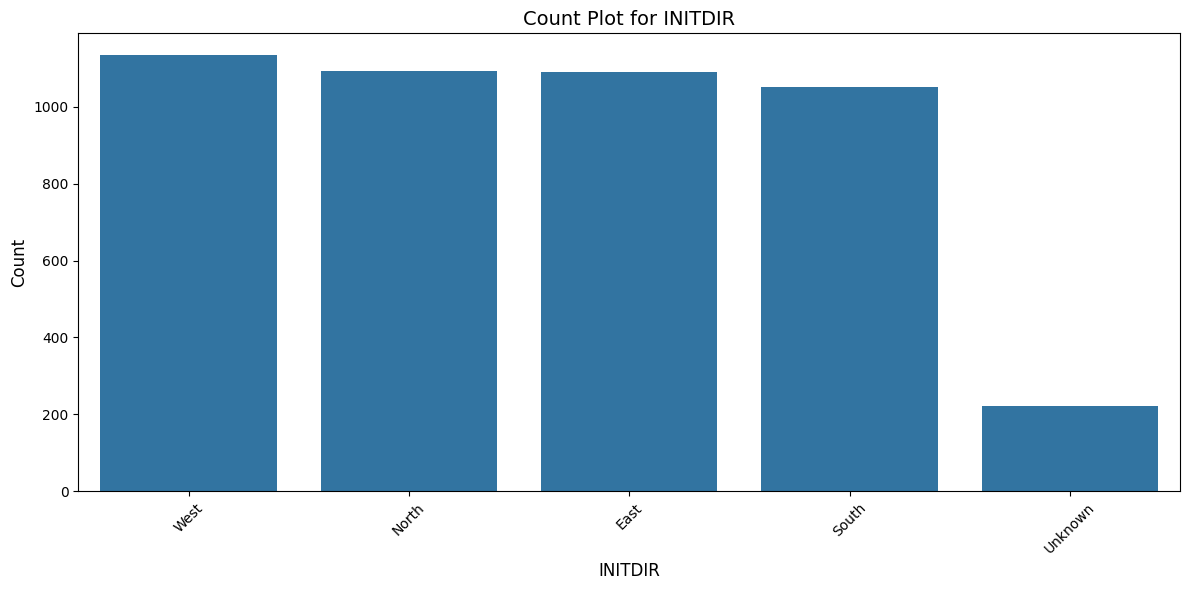

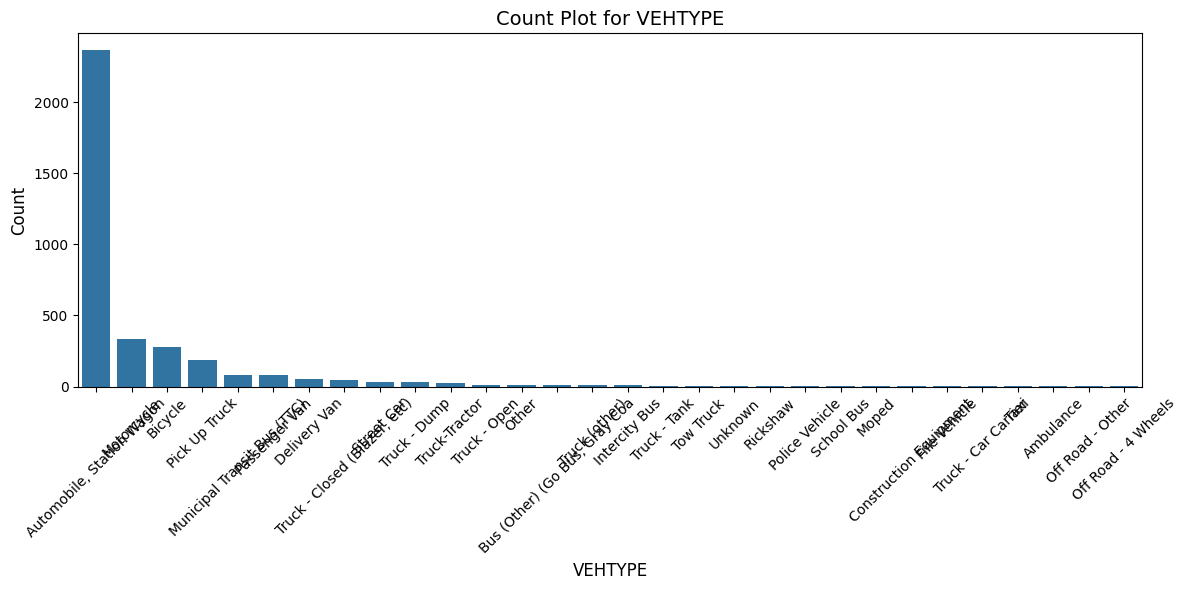

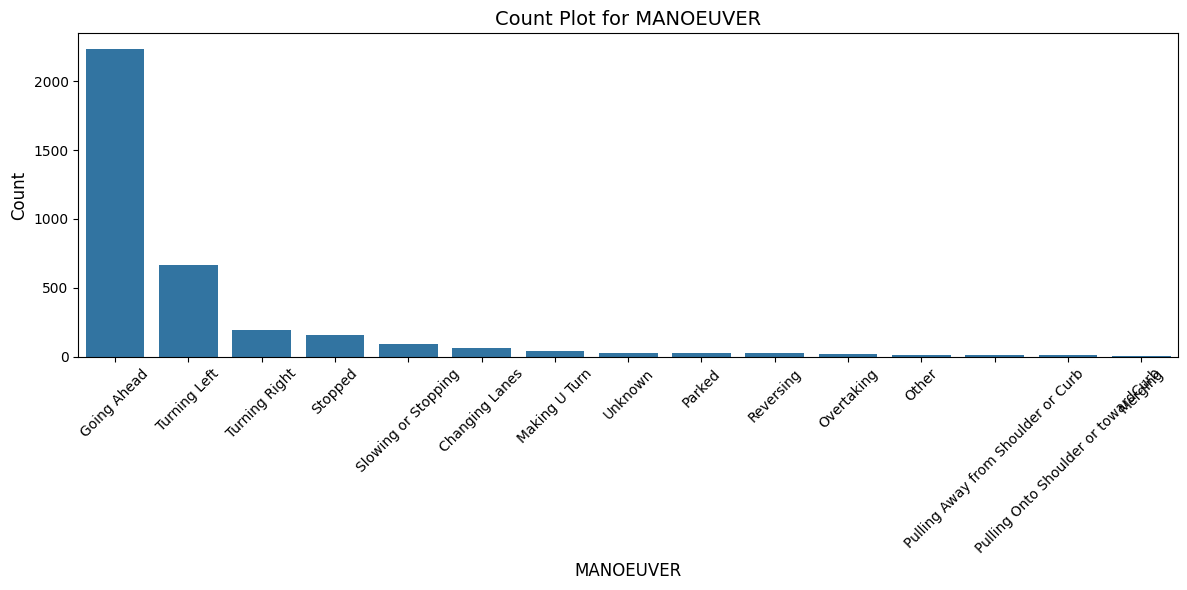

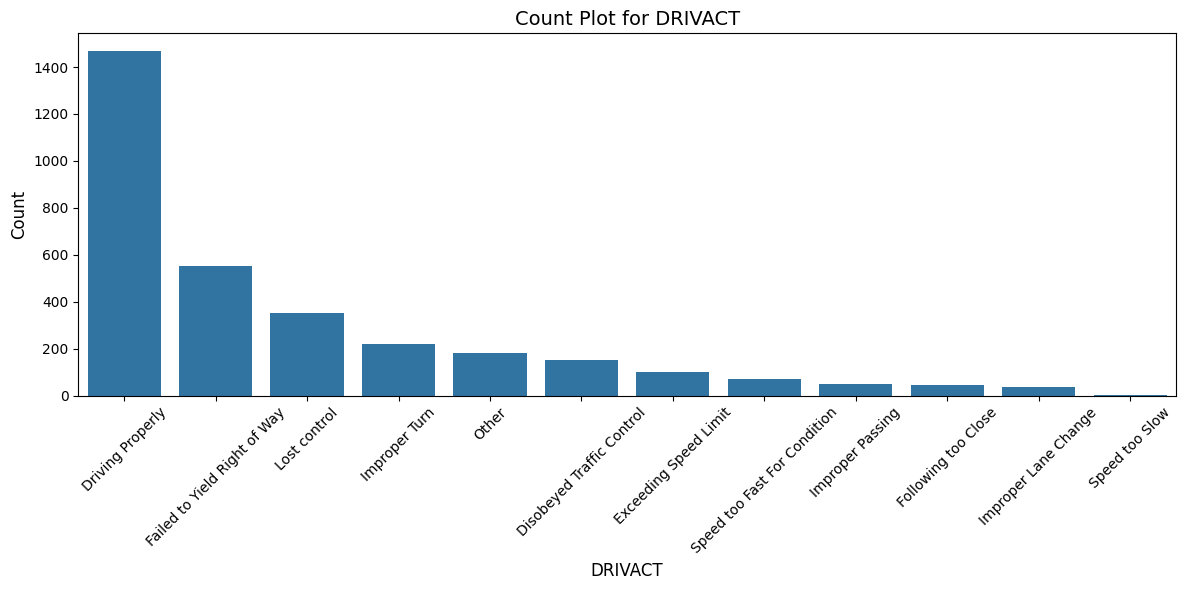

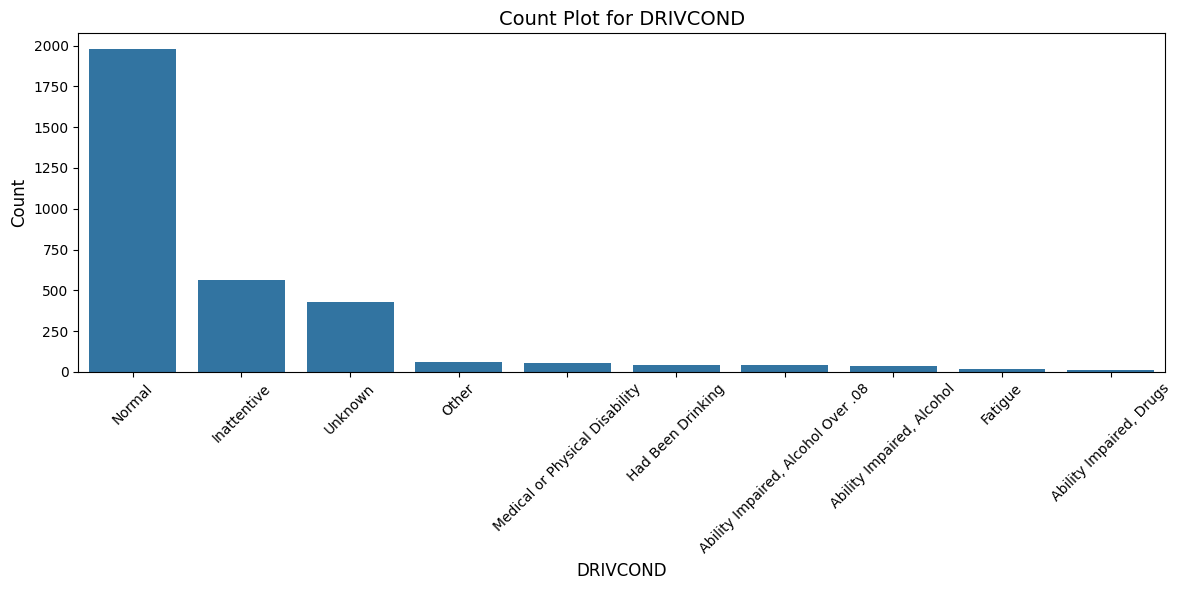

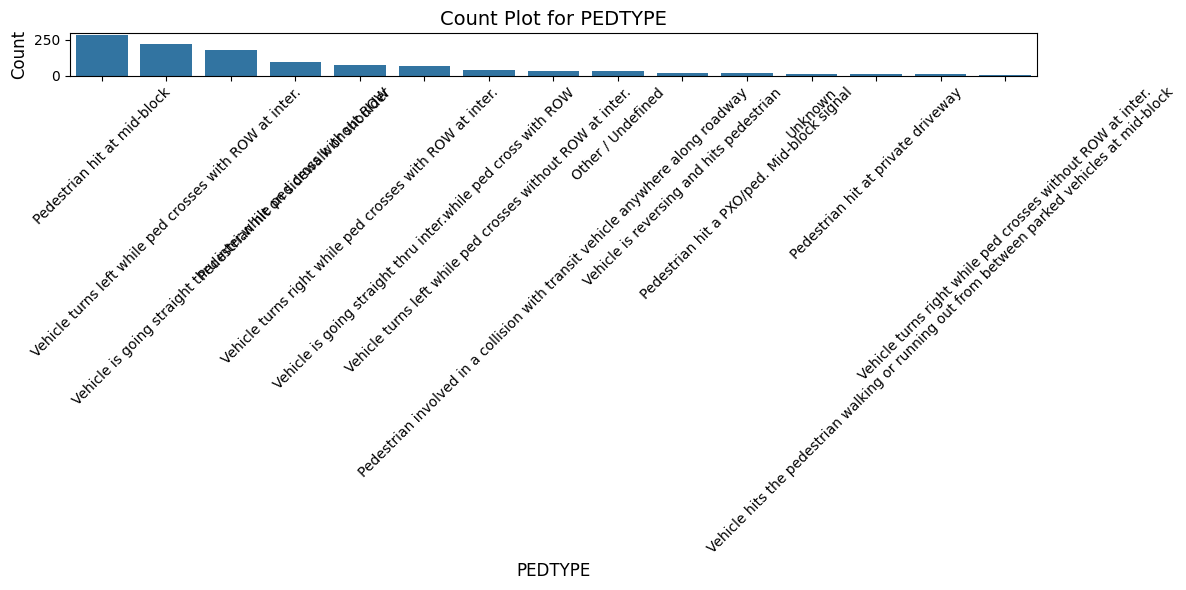

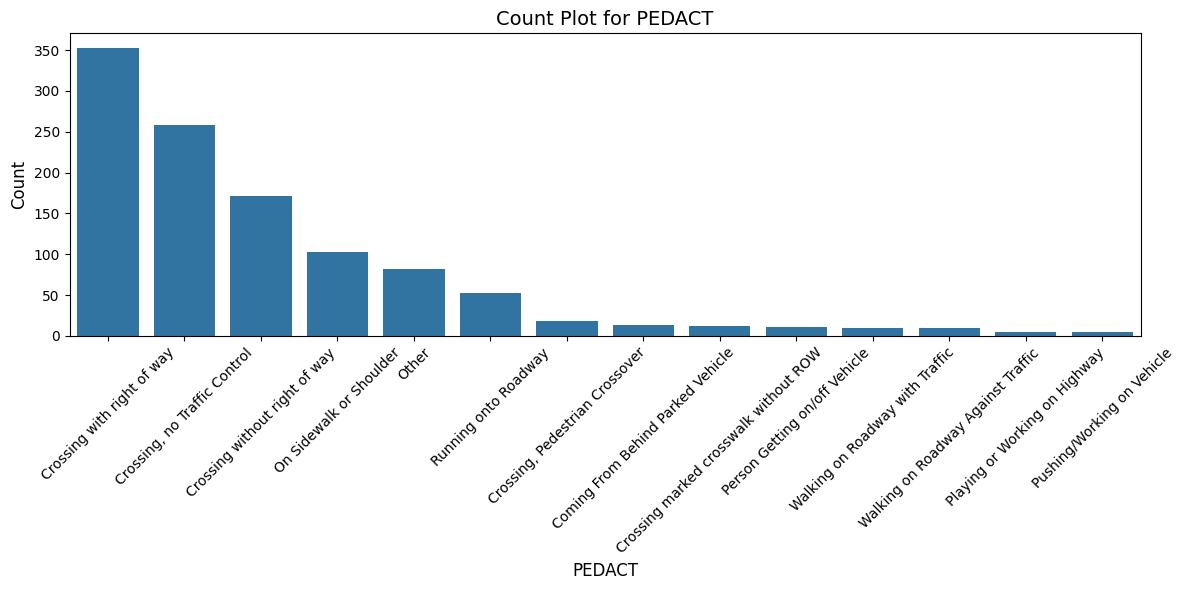

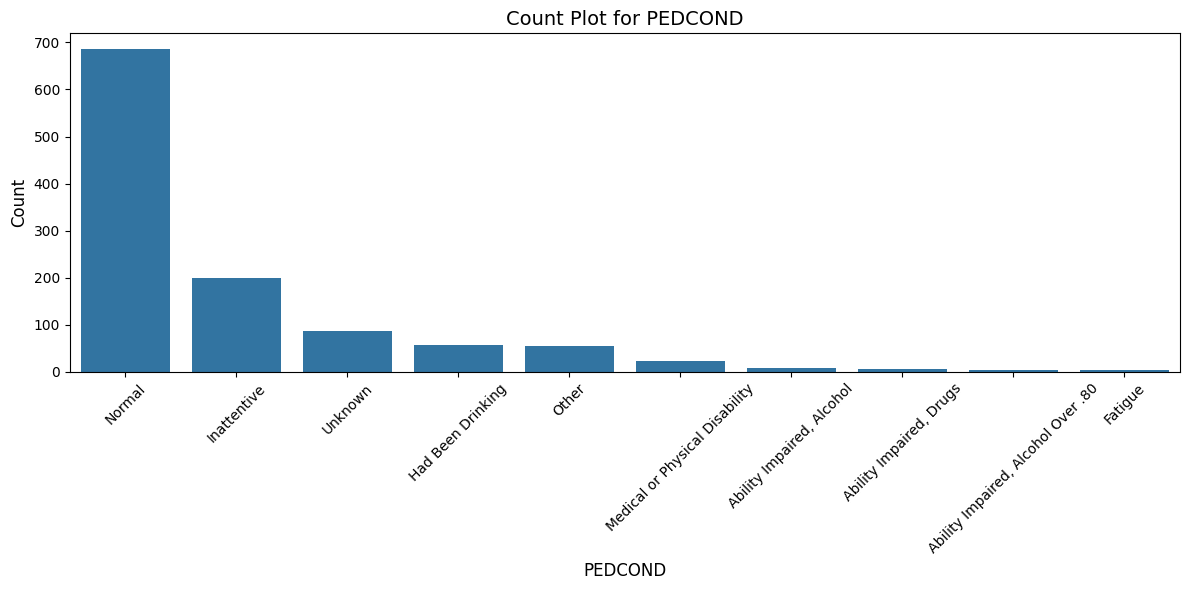

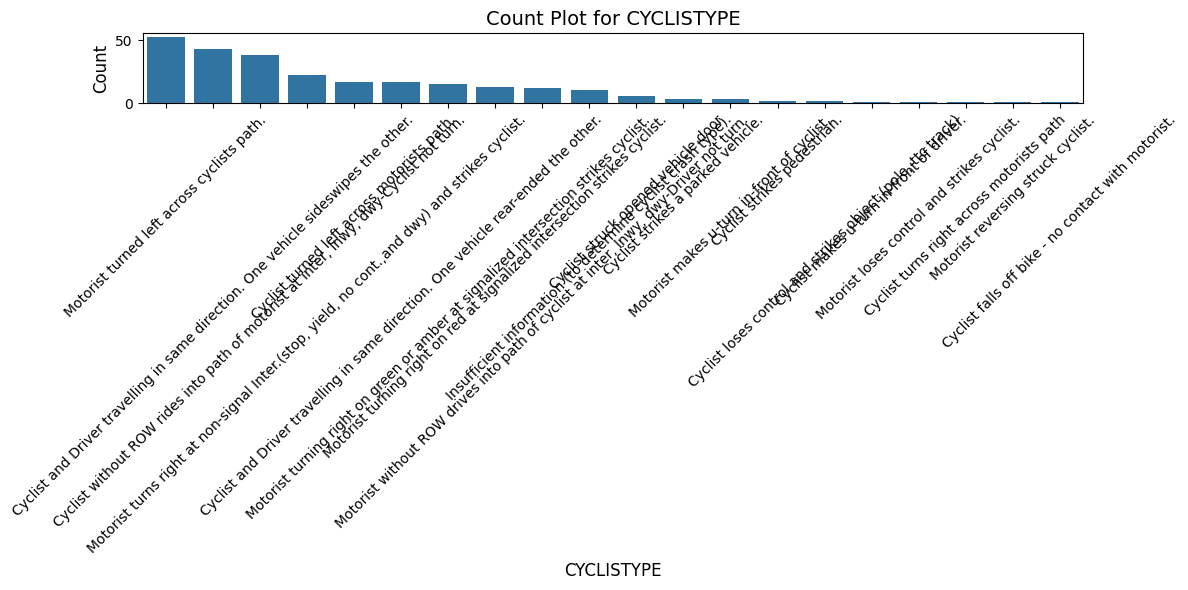

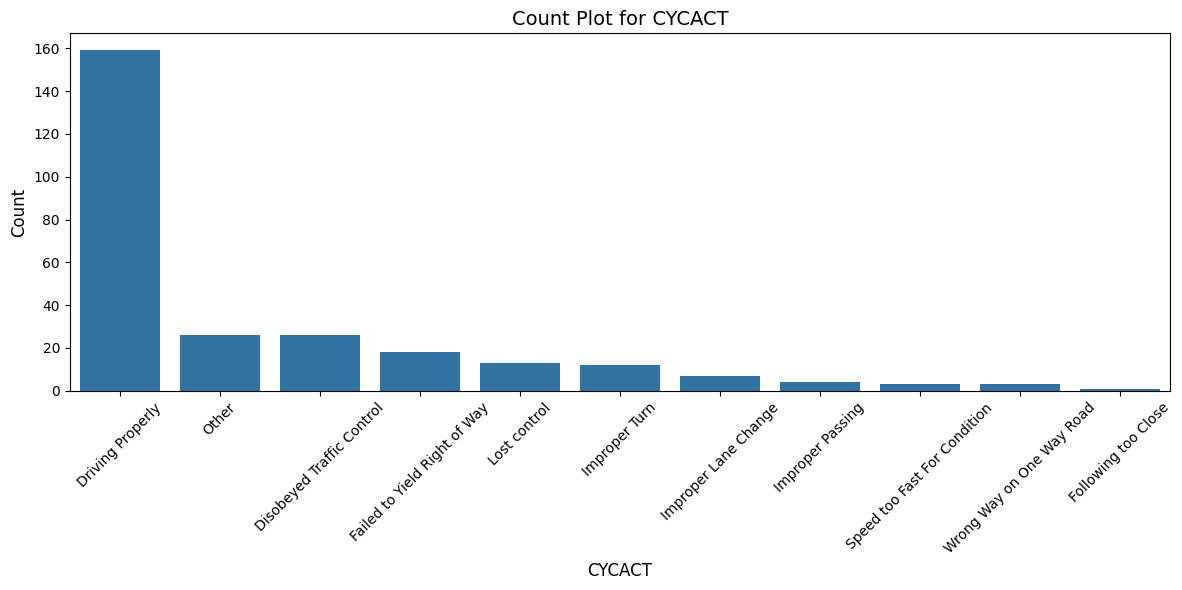

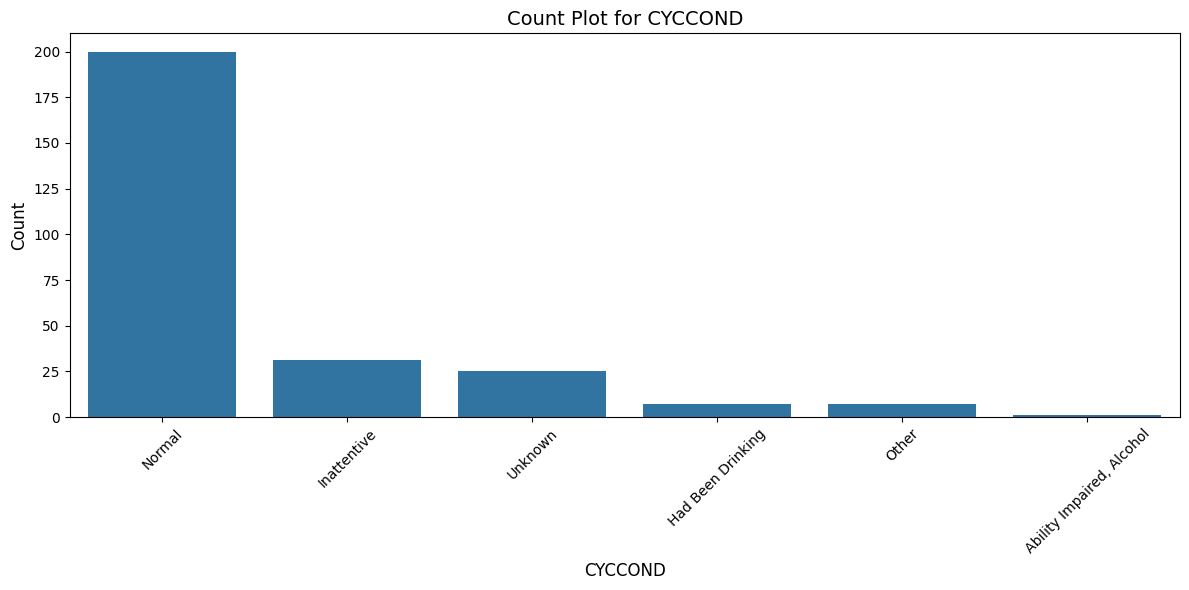

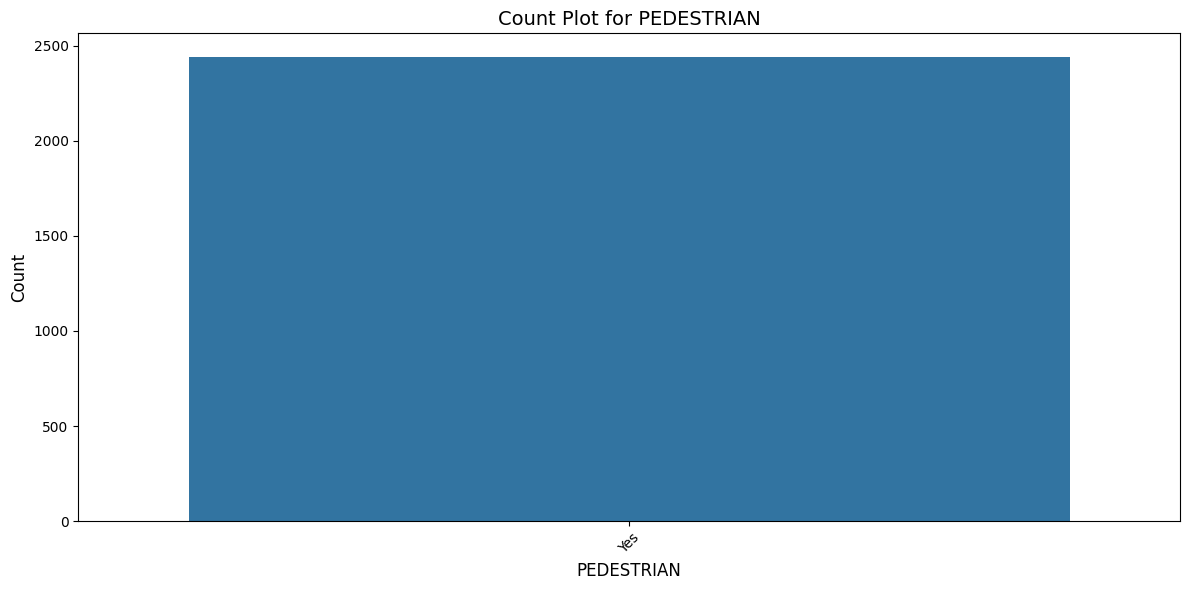

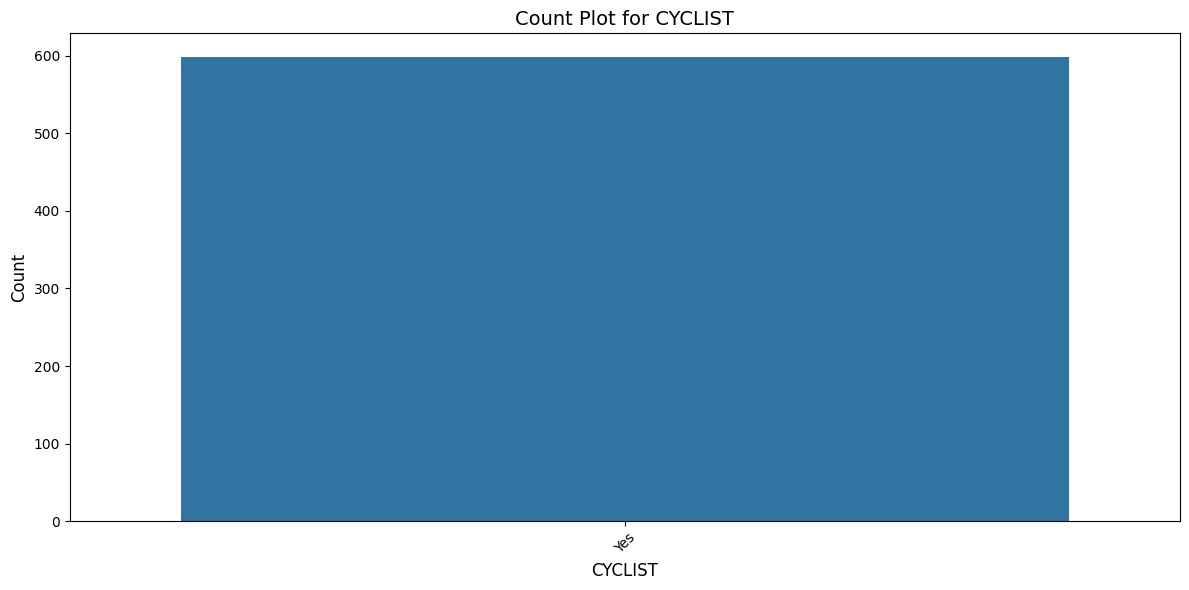

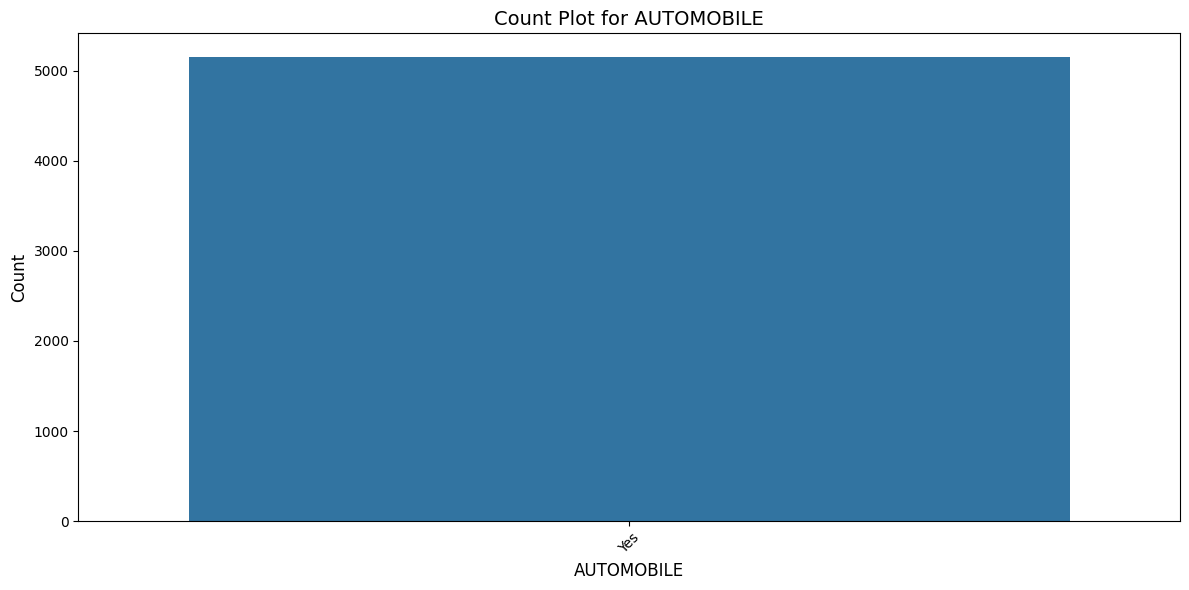

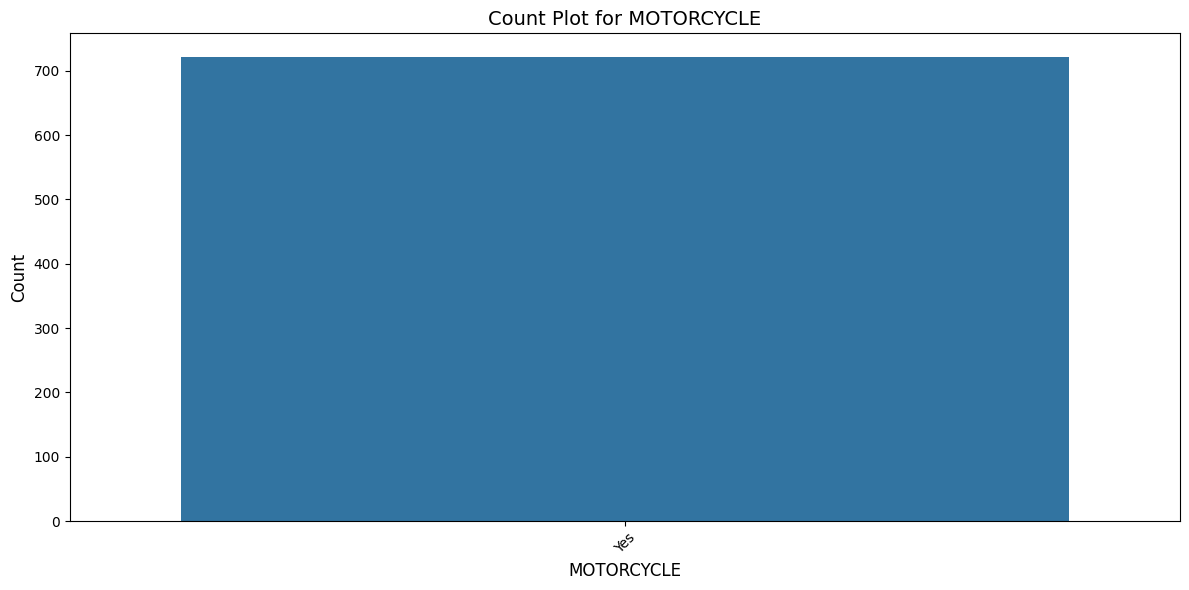

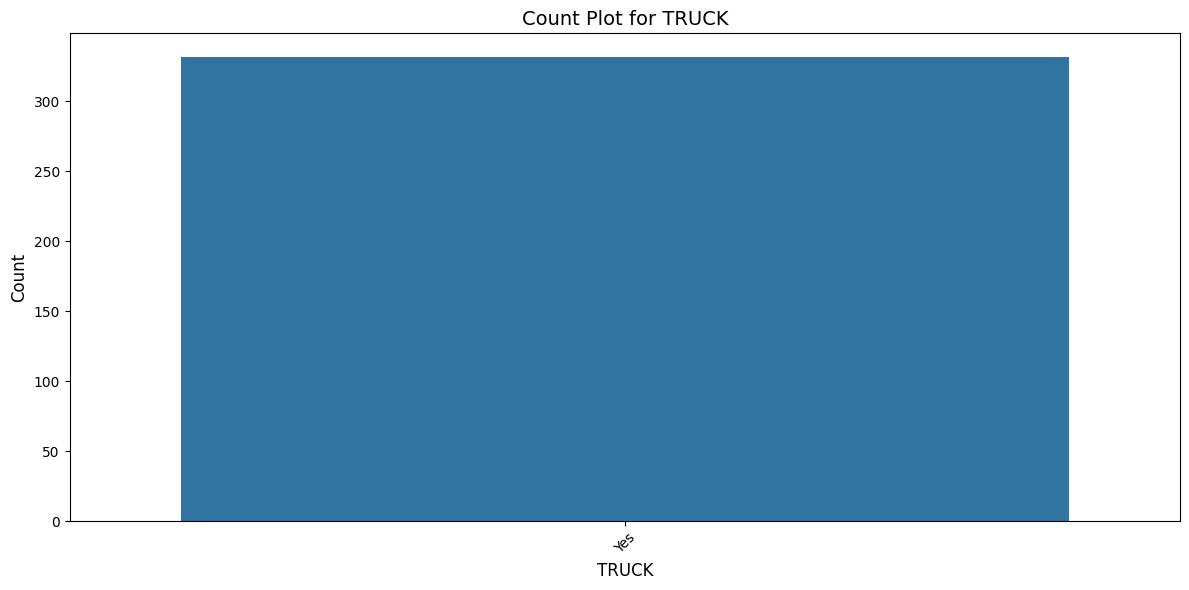

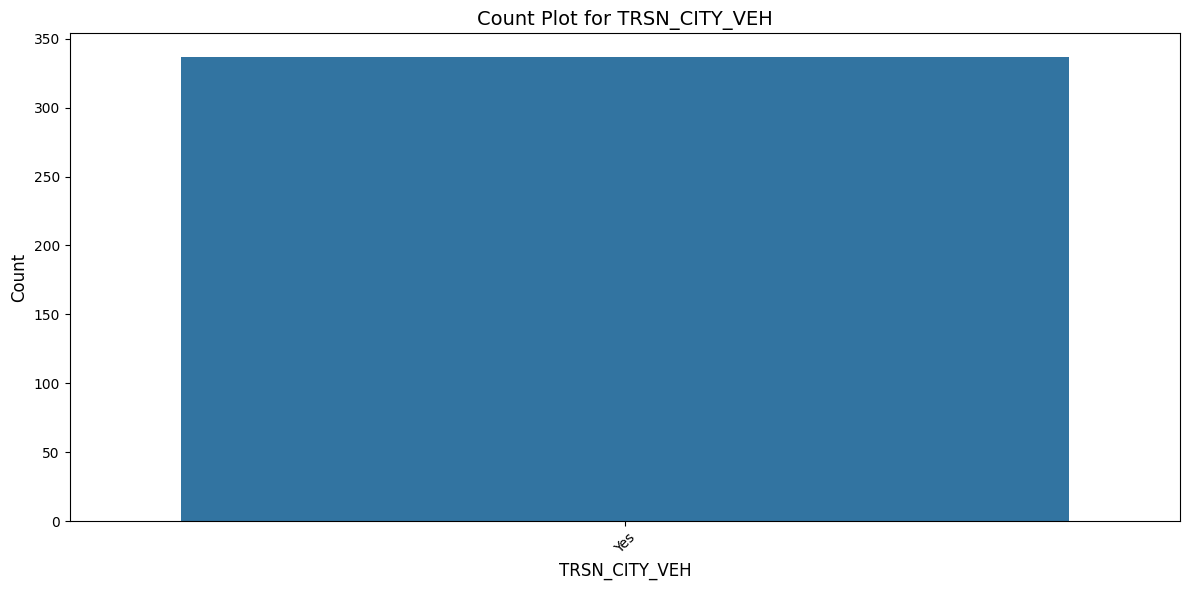

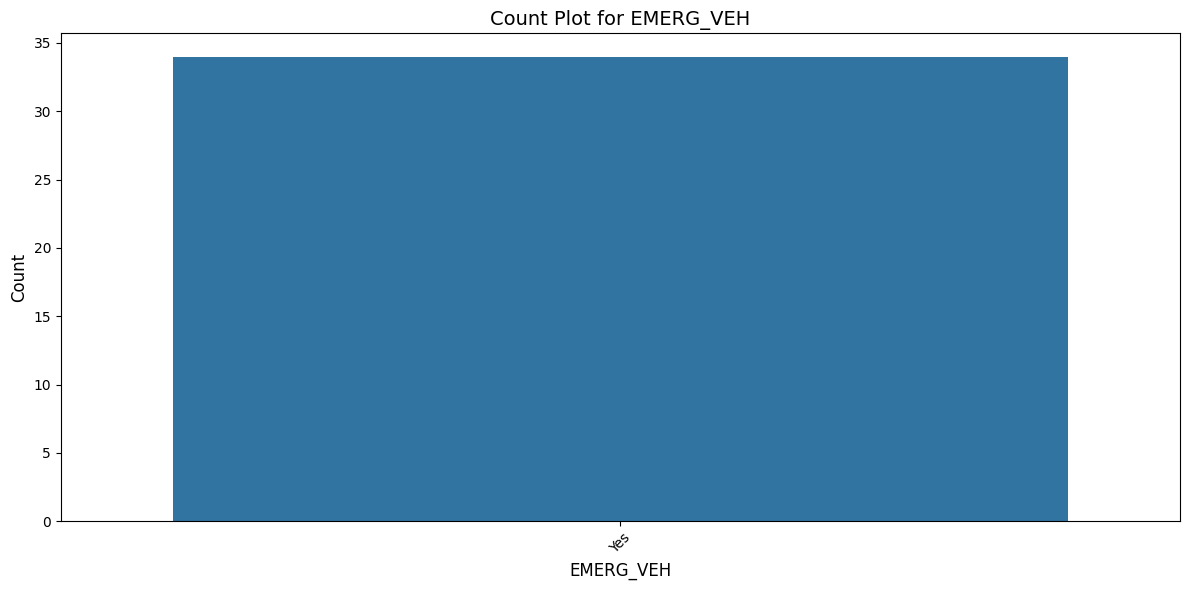

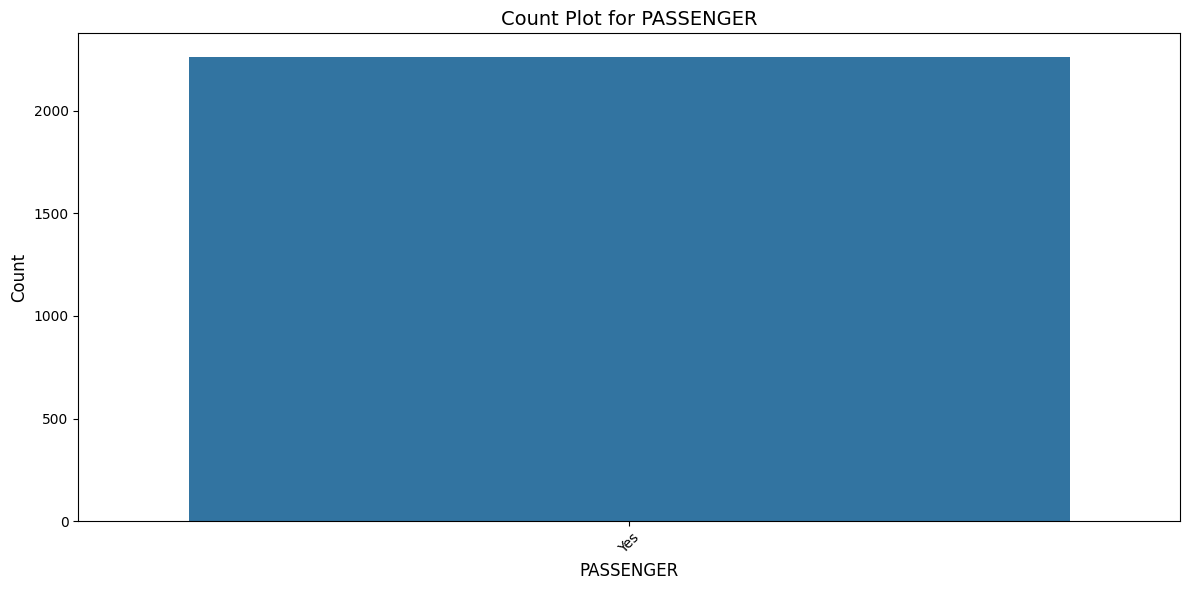

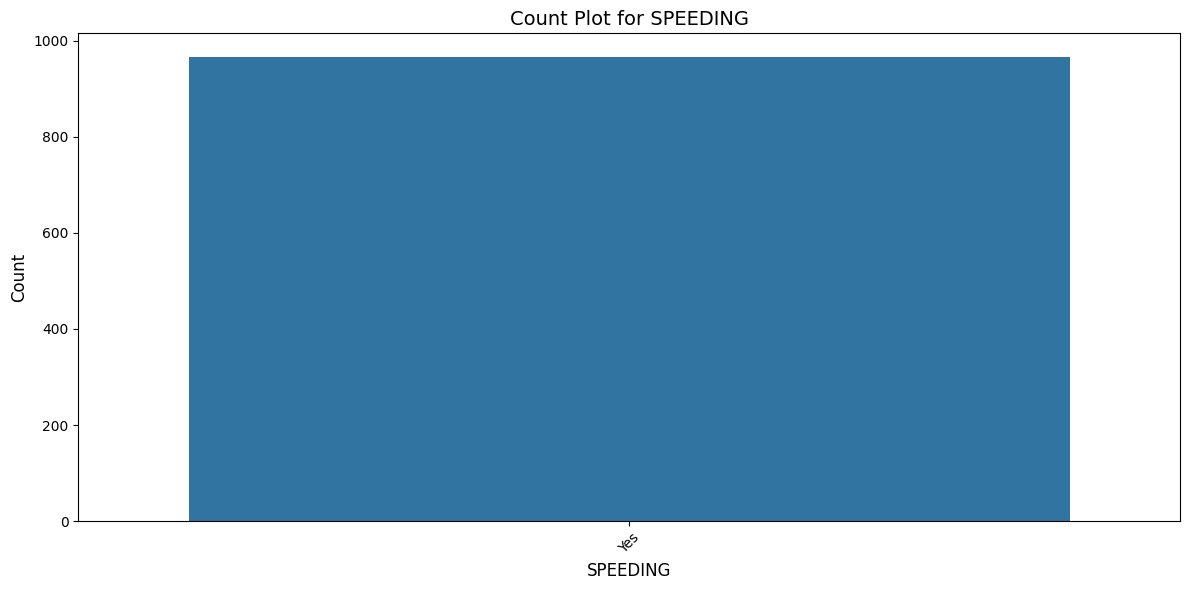

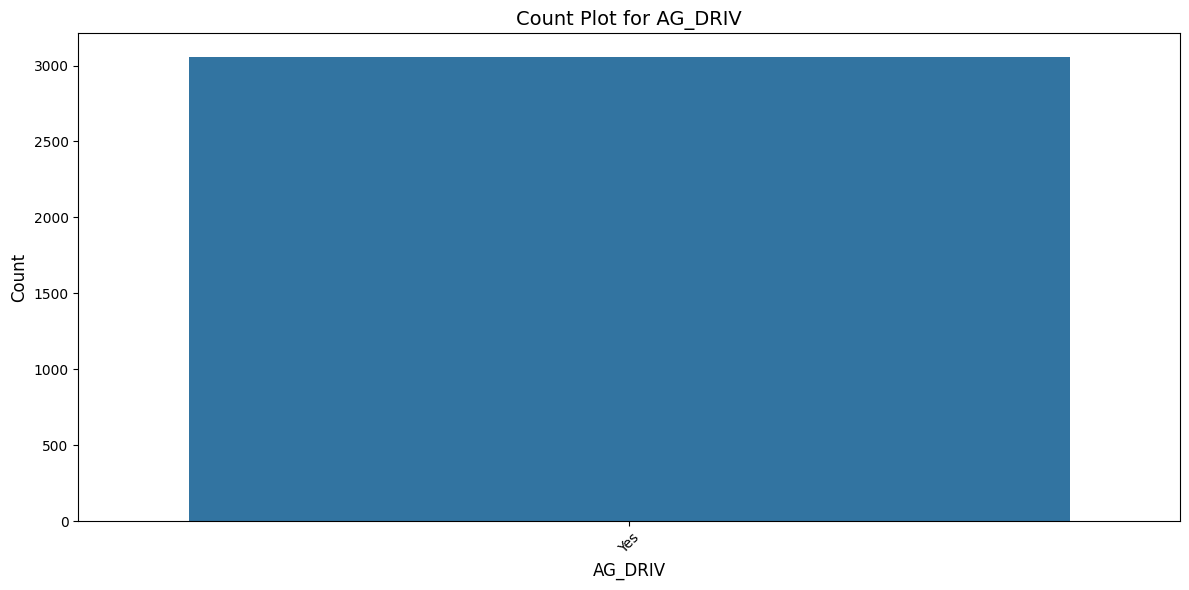

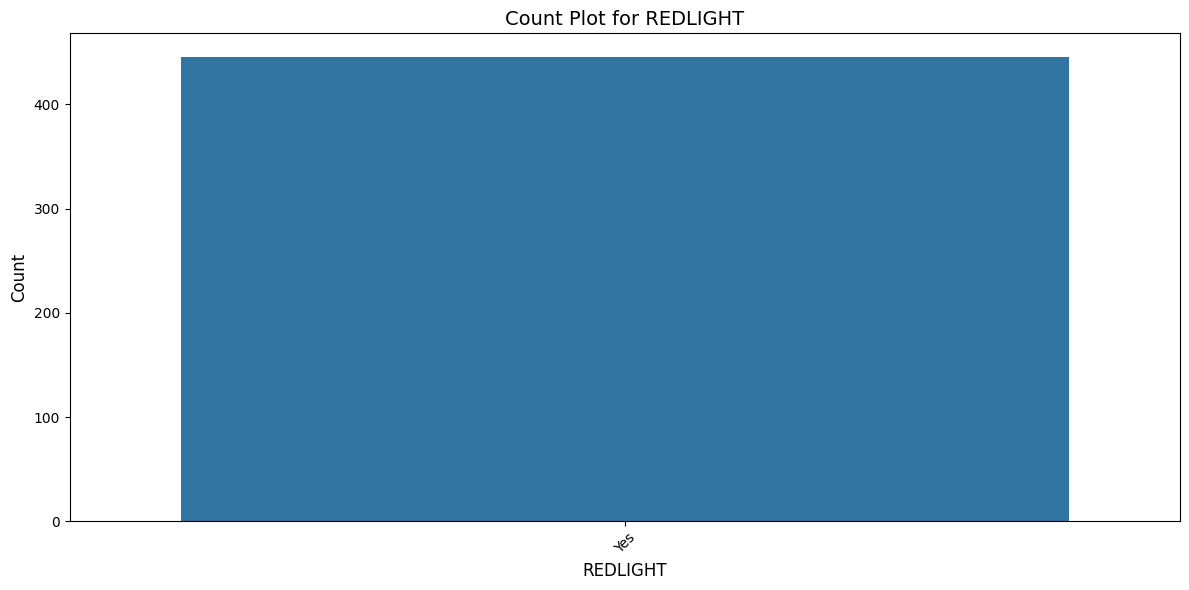

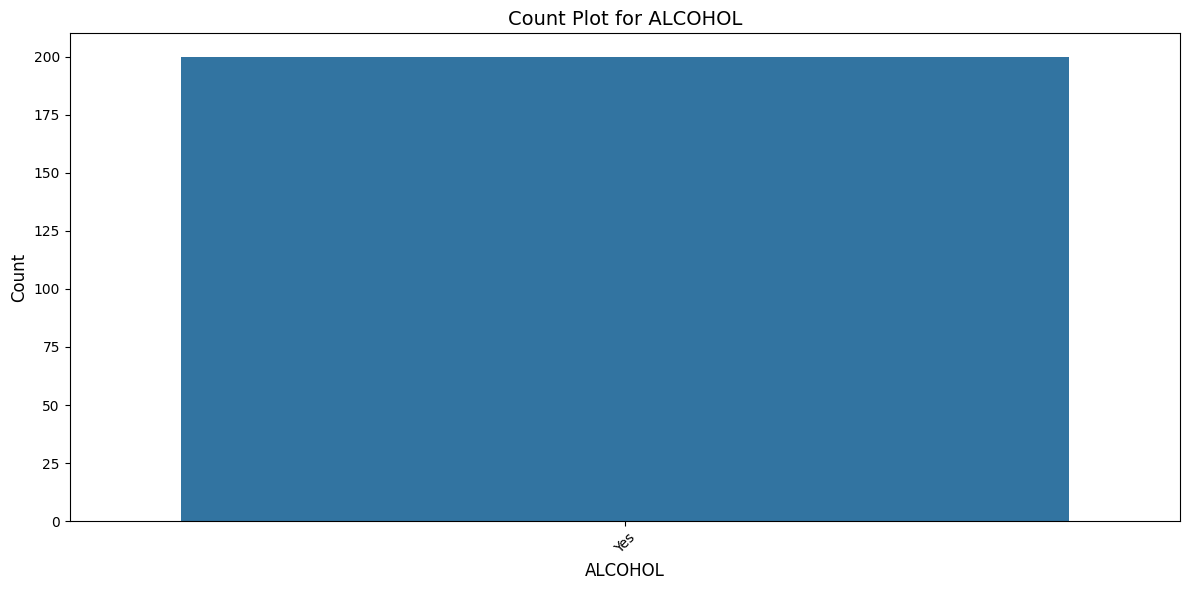

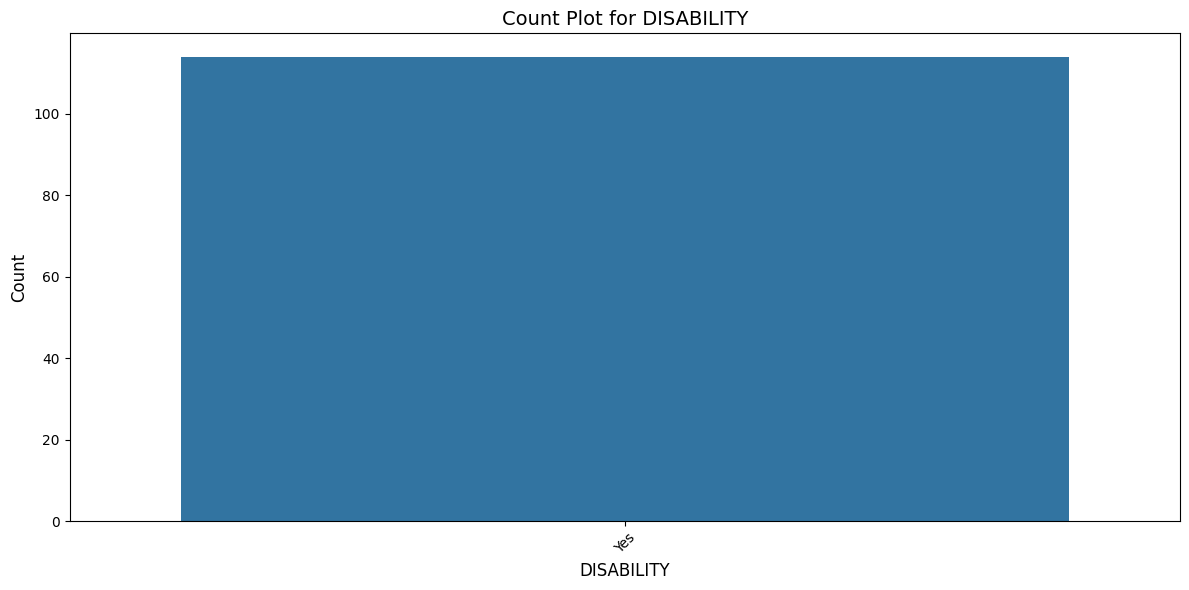

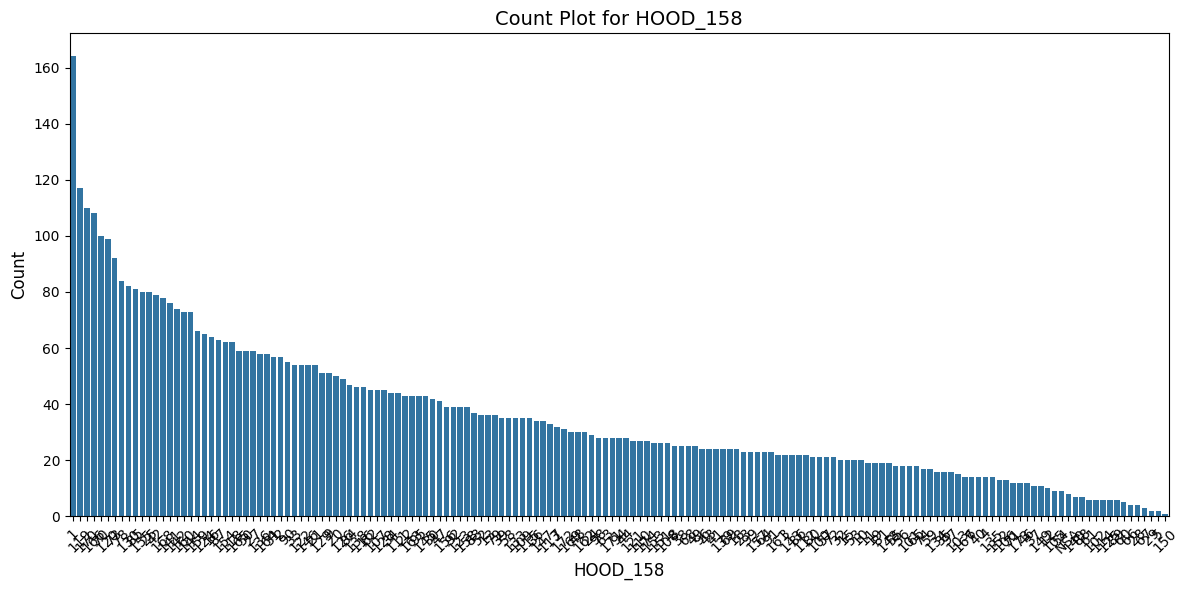

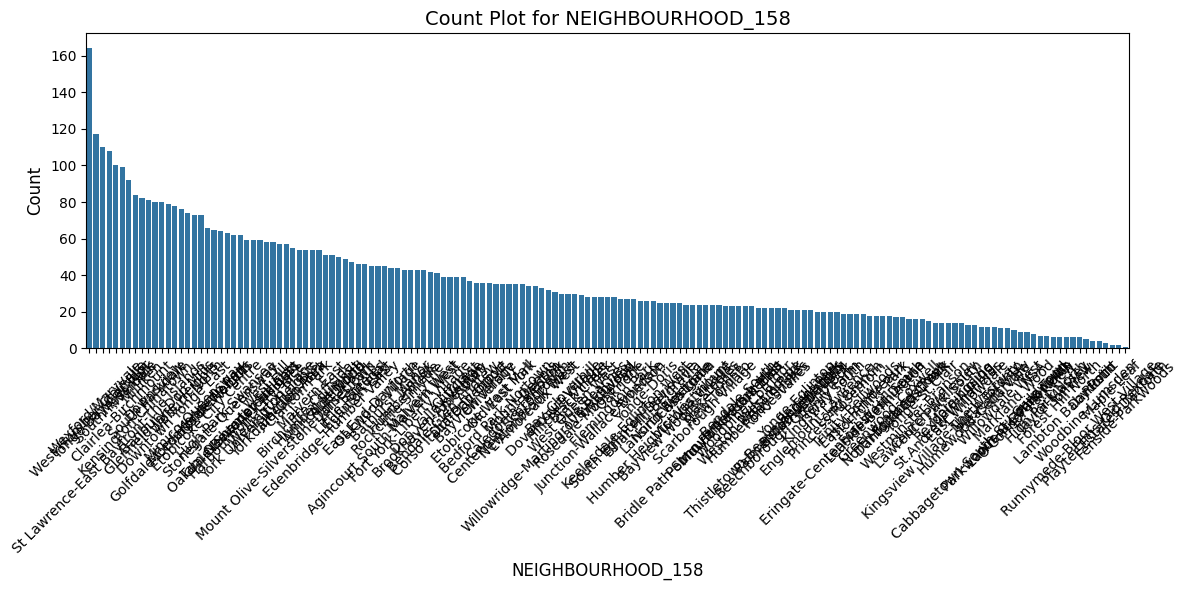

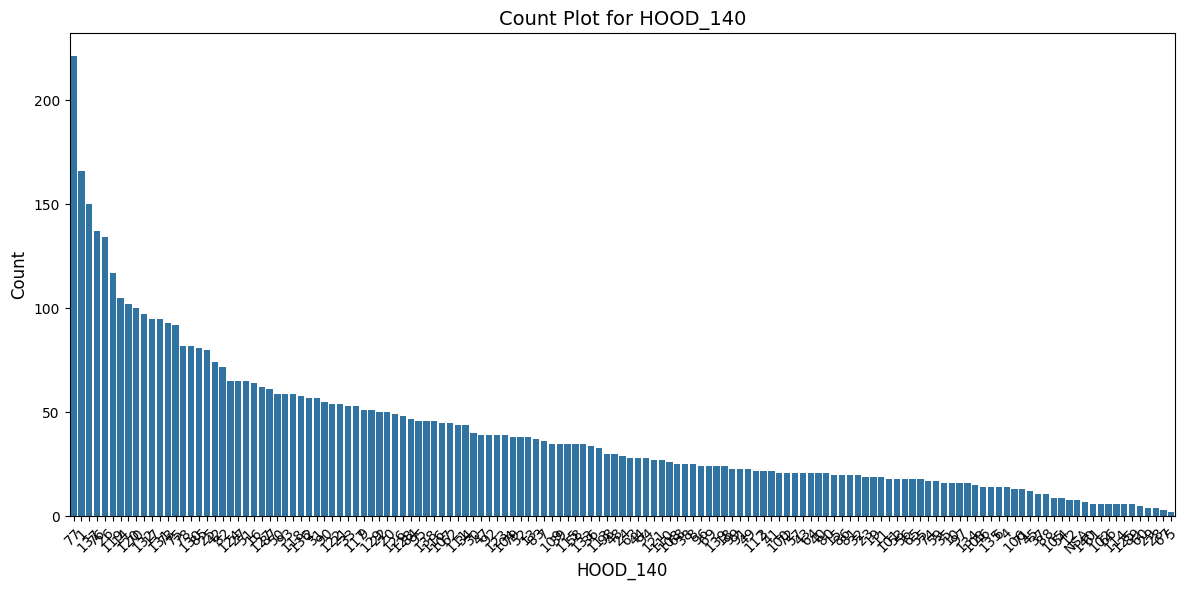

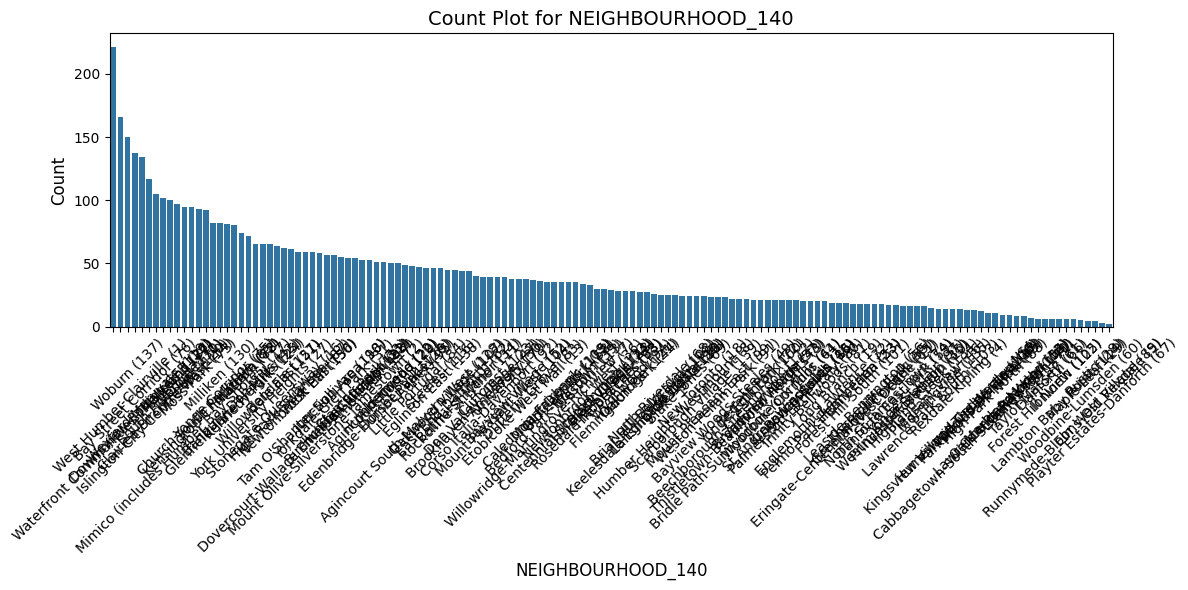

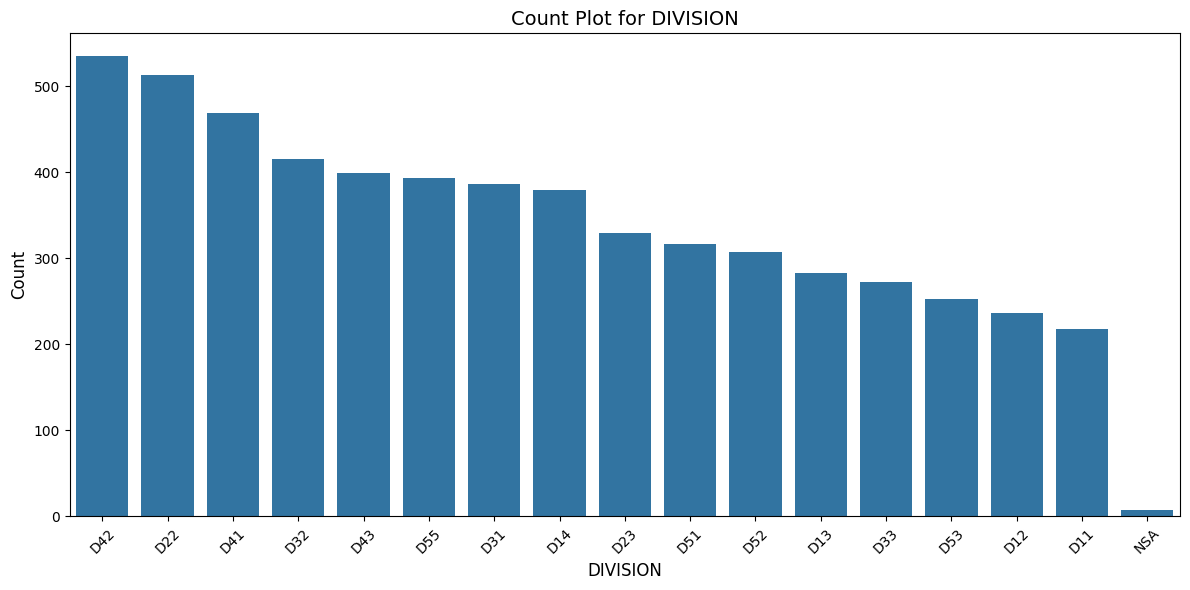

In [7]:
#Plot Count Plots for Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f'Count Plot for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

In [8]:
#Variables have different levels to them, we can find out the amount for each in the collisions
factors = [
    "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT", "RDSFCOND", "ACCLASS",
    "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER", "DRIVACT", "DRIVCOND",
    "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND",
    "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE", "TRUCK",
    "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

#Loop through each factor and display its count distribution
for col in factors:
    if col in data.columns:
        print(f"Counts for {col}:")
        print(data[col].value_counts(dropna=False))
        print("\n" + "="*50 + "\n")
    else:
        print(f"Column '{col}' not found in the dataset.\n")

Counts for ACCLOC:
ACCLOC
At Intersection          2655
Non Intersection         1701
Intersection Related     1044
At/Near Private Drive     284
Overpass or Bridge         10
Laneway                     9
Other                       8
NaN                         6
Underpass or Tunnel         2
Name: count, dtype: int64


Counts for TRAFFCTL:
TRAFFCTL
No Control              2640
Traffic Signal          2509
Stop Sign                425
Traffic Controller        50
NaN                       46
Pedestrian Crossover      36
Yield Sign                10
Streetcar (Stop for)       3
Name: count, dtype: int64


Counts for VISIBILITY:
VISIBILITY
Clear                     5044
Rain                       522
Snow                        68
Other                       25
NaN                         24
Freezing Rain               16
Fog, Mist, Smoke, Dust       9
Drifting Snow                9
Strong wind                  2
Name: count, dtype: int64


Counts for LIGHT:
LIGHT
Daylight             

In [9]:
#Convert some categorical columns to numerical columns
#ROAD_CLASS, DISTRICT, ACCLOC, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, ACCLASS,
#IMPACTYPE, INVTYPE, INJURY, MANOEUVER, DRIVACT, DRICOND, PEDTYPE, PEDACT, PEDCOND,
#CYCLISTYPE, CYCACT, CYCOND, PEDESTRIAN, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK,
#TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, AG_DRIV, REDLIGHT, ALCOHOL, DISABILITY
#DIVISION

#Changing the date
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')


#Convert categorical variables to numerical variables where needed.
data['ROAD_CLASS'] = data['ROAD_CLASS'].astype('category').cat.codes
data['DISTRICT'] = data['DISTRICT'].astype('category').cat.codes
data['ACCLOC'] = data['ACCLOC'].astype('category').cat.codes
data['TRAFFCTL'] = data['TRAFFCTL'].astype('category').cat.codes
data['VISIBILITY'] = data['VISIBILITY'].astype('category').cat.codes
data['LIGHT'] = data['LIGHT'].astype('category').cat.codes
data['RDSFCOND'] = data['RDSFCOND'].astype('category').cat.codes
data['ACCLASS'] = data['ACCLASS'].astype('category').cat.codes
data['IMPACTYPE'] = data['IMPACTYPE'].astype('category').cat.codes
data['INVTYPE'] = data['INVTYPE'].astype('category').cat.codes
data['INJURY'] = data['INJURY'].astype('category').cat.codes
data['MANOEUVER'] = data['MANOEUVER'].astype('category').cat.codes
data['DRIVACT'] = data['DRIVACT'].astype('category').cat.codes
data['DRIVCOND'] = data['DRIVCOND'].astype('category').cat.codes
data['PEDTYPE'] = data['PEDTYPE'].astype('category').cat.codes
data['PEDACT'] = data['PEDACT'].astype('category').cat.codes
data['PEDCOND'] = data['PEDCOND'].astype('category').cat.codes
data['CYCLISTYPE'] = data['CYCLISTYPE'].astype('category').cat.codes
data['CYCACT'] = data['CYCACT'].astype('category').cat.codes
data['CYCCOND'] = data['CYCCOND'].astype('category').cat.codes
data['PEDESTRIAN'] = data['PEDESTRIAN'].astype('category').cat.codes
data['CYCLIST'] = data['CYCLIST'].astype('category').cat.codes
data['AUTOMOBILE'] = data['AUTOMOBILE'].astype('category').cat.codes
data['MOTORCYCLE'] = data['MOTORCYCLE'].astype('category').cat.codes
data['TRUCK'] = data['TRUCK'].astype('category').cat.codes
data['TRSN_CITY_VEH'] = data['TRSN_CITY_VEH'].astype('category').cat.codes
data['EMERG_VEH'] = data['EMERG_VEH'].astype('category').cat.codes
data['PASSENGER'] = data['PASSENGER'].astype('category').cat.codes
data['SPEEDING'] = data['SPEEDING'].astype('category').cat.codes
data['AG_DRIV'] = data['AG_DRIV'].astype('category').cat.codes
data['REDLIGHT'] = data['REDLIGHT'].astype('category').cat.codes
data['ALCOHOL'] = data['ALCOHOL'].astype('category').cat.codes
data['DISABILITY'] = data['DISABILITY'].astype('category').cat.codes
data['DIVISION'] = data['DIVISION'].astype('category').cat.codes

#Check data types
print(data.dtypes)

OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                     int8
DISTRICT                       int8
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                         int8
TRAFFCTL                       int8
VISIBILITY                     int8
LIGHT                          int8
RDSFCOND                       int8
ACCLASS                        int8
IMPACTYPE                      int8
INVTYPE                        int8
INVAGE                       object
INJURY                         int8
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                      int8
DRIVACT                        int8
DRIVCOND                    

In [10]:
#Find the Missing values for each variable, Numerical and Categorical
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
OBJECTID                0
INDEX                   0
ACCNUM               2991
DATE                    0
TIME                    0
STREET1                 0
STREET2               537
OFFSET               2956
ROAD_CLASS              0
DISTRICT                0
LATITUDE                0
LONGITUDE               0
ACCLOC                  0
TRAFFCTL                0
VISIBILITY              0
LIGHT                   0
RDSFCOND                0
ACCLASS                 0
IMPACTYPE               0
INVTYPE                 0
INVAGE                  0
INJURY                  0
FATAL_NO             5329
INITDIR              1131
VEHTYPE              2104
MANOEUVER               0
DRIVACT                 0
DRIVCOND                0
PEDTYPE                 0
PEDACT                  0
PEDCOND                 0
CYCLISTYPE              0
CYCACT                  0
CYCCOND                 0
PEDESTRIAN              0
CYCLIST                 0
AUTOMOBILE              0
MOTORCYCLE            

In [11]:
#Filling in missing values
if data['ACCNUM'].dtype == 'object':
  data['ACCNUM'] = data['ACCNUM'].fillna("Unknown")
else:
  data['ACCNUM'] = data['ACCNUM'].fillna(0)

data['OFFSET'] = data['OFFSET'].fillna(0)
data['FATAL_NO'] = data['FATAL_NO'].fillna(0)

if data['INITDIR'].dtype == 'object':
  data['INITDIR'] = data['INITDIR'].fillna("Unknown")
else:
  data['INITDIR'] = data['INITDIR'].fillna(-1)

if data['VEHTYPE'].dtype == 'object':
  data['VEHTYPE'] = data['VEHTYPE'].fillna("Unknown")
else:
  data['VEHTYPE'] = data['VEHTYPE'].fillna(-1)

if data['STREET2'].dtype == 'object':
  data['STREET2'] = data['STREET2'].fillna("Unknown")
else:
  data['STREET2'] = data['STREET2'].fillna(-1)

#Check to see if values are still missing
print("Missing values after imputation:")
print(data[['ACCNUM', 'OFFSET', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'STREET2']].isnull().sum())

Missing values after imputation:
ACCNUM      0
OFFSET      0
FATAL_NO    0
INITDIR     0
VEHTYPE     0
STREET2     0
dtype: int64


In [12]:
#Make sure Numerical and Categorical columns have no missing values
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-12-33beaf6f6c70>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-12-33beaf6f6c70>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [13]:
#List of columns to convert (ensure the column names match exactly)
cols_to_convert = [
    "ROAD_CLASS", "DISTRICT", "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT",
    "RDSFCOND", "ACCLASS", "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER",
    "DRIVACT", "DRIVCOND", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE",
    "CYCACT", "CYCCOND", "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE",
    "TRUCK", "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

#Convert each listed column to a categorical variable then to numeric codes
for col in cols_to_convert:
    if col in data.columns:
        data[col] = data[col].astype('category').cat.codes
    else:
        print(f"Column {col} not found in the dataset.")

#Show conversion by printing data types again
print(data.dtypes)

OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                     int8
DISTRICT                       int8
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                         int8
TRAFFCTL                       int8
VISIBILITY                     int8
LIGHT                          int8
RDSFCOND                       int8
ACCLASS                        int8
IMPACTYPE                      int8
INVTYPE                        int8
INVAGE                       object
INJURY                         int8
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                      int8
DRIVACT                        int8
DRIVCOND                    

In [14]:
#Convert categorical variables to numerical varaibles
cols_to_convert = [
    "ROAD_CLASS", "DISTRICT", "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT",
    "RDSFCOND", "ACCLASS", "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER",
    "DRIVACT", "DRIVCOND", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE",
    "CYCACT", "CYCCOND", "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE",
    "TRUCK", "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

for col in cols_to_convert:
    if col in data.columns:
        # Attempt to convert to numeric; non-numeric values become NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Replace NaN with 0
        data[col] = data[col].fillna(0)
        # Convert the column to integer type
        data[col] = data[col].astype(int)
    else:
        print(f"Column '{col}' not found in the dataset.")

print(data.dtypes)


OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                    int64
DISTRICT                      int64
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                        int64
TRAFFCTL                      int64
VISIBILITY                    int64
LIGHT                         int64
RDSFCOND                      int64
ACCLASS                       int64
IMPACTYPE                     int64
INVTYPE                       int64
INVAGE                       object
INJURY                        int64
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                     int64
DRIVACT                       int64
DRIVCOND                    


Spearman Correlation Matrix:
               OBJECTID     INDEX    ACCNUM      TIME  ROAD_CLASS  DISTRICT  \
OBJECTID       1.000000  0.978175  0.924811  0.064791   -0.071278 -0.049373   
INDEX          0.978175  1.000000  0.907774  0.052181   -0.082679 -0.058740   
ACCNUM         0.924811  0.907774  1.000000  0.065596   -0.079591 -0.054104   
TIME           0.064791  0.052181  0.065596  1.000000    0.038174 -0.042395   
ROAD_CLASS    -0.071278 -0.082679 -0.079591  0.038174    1.000000  0.155925   
DISTRICT      -0.049373 -0.058740 -0.054104 -0.042395    0.155925  1.000000   
LATITUDE      -0.079557 -0.085314 -0.076515  0.049708   -0.003602 -0.148982   
LONGITUDE     -0.032331 -0.040555 -0.048830  0.005533    0.072097  0.537498   
ACCLOC         0.171851  0.172348  0.208294  0.010496   -0.149927 -0.019230   
TRAFFCTL       0.047691  0.042692  0.038683 -0.039658    0.086411  0.007753   
VISIBILITY    -0.022037 -0.020824 -0.013296  0.061573   -0.030107  0.027488   
LIGHT         -0.02422

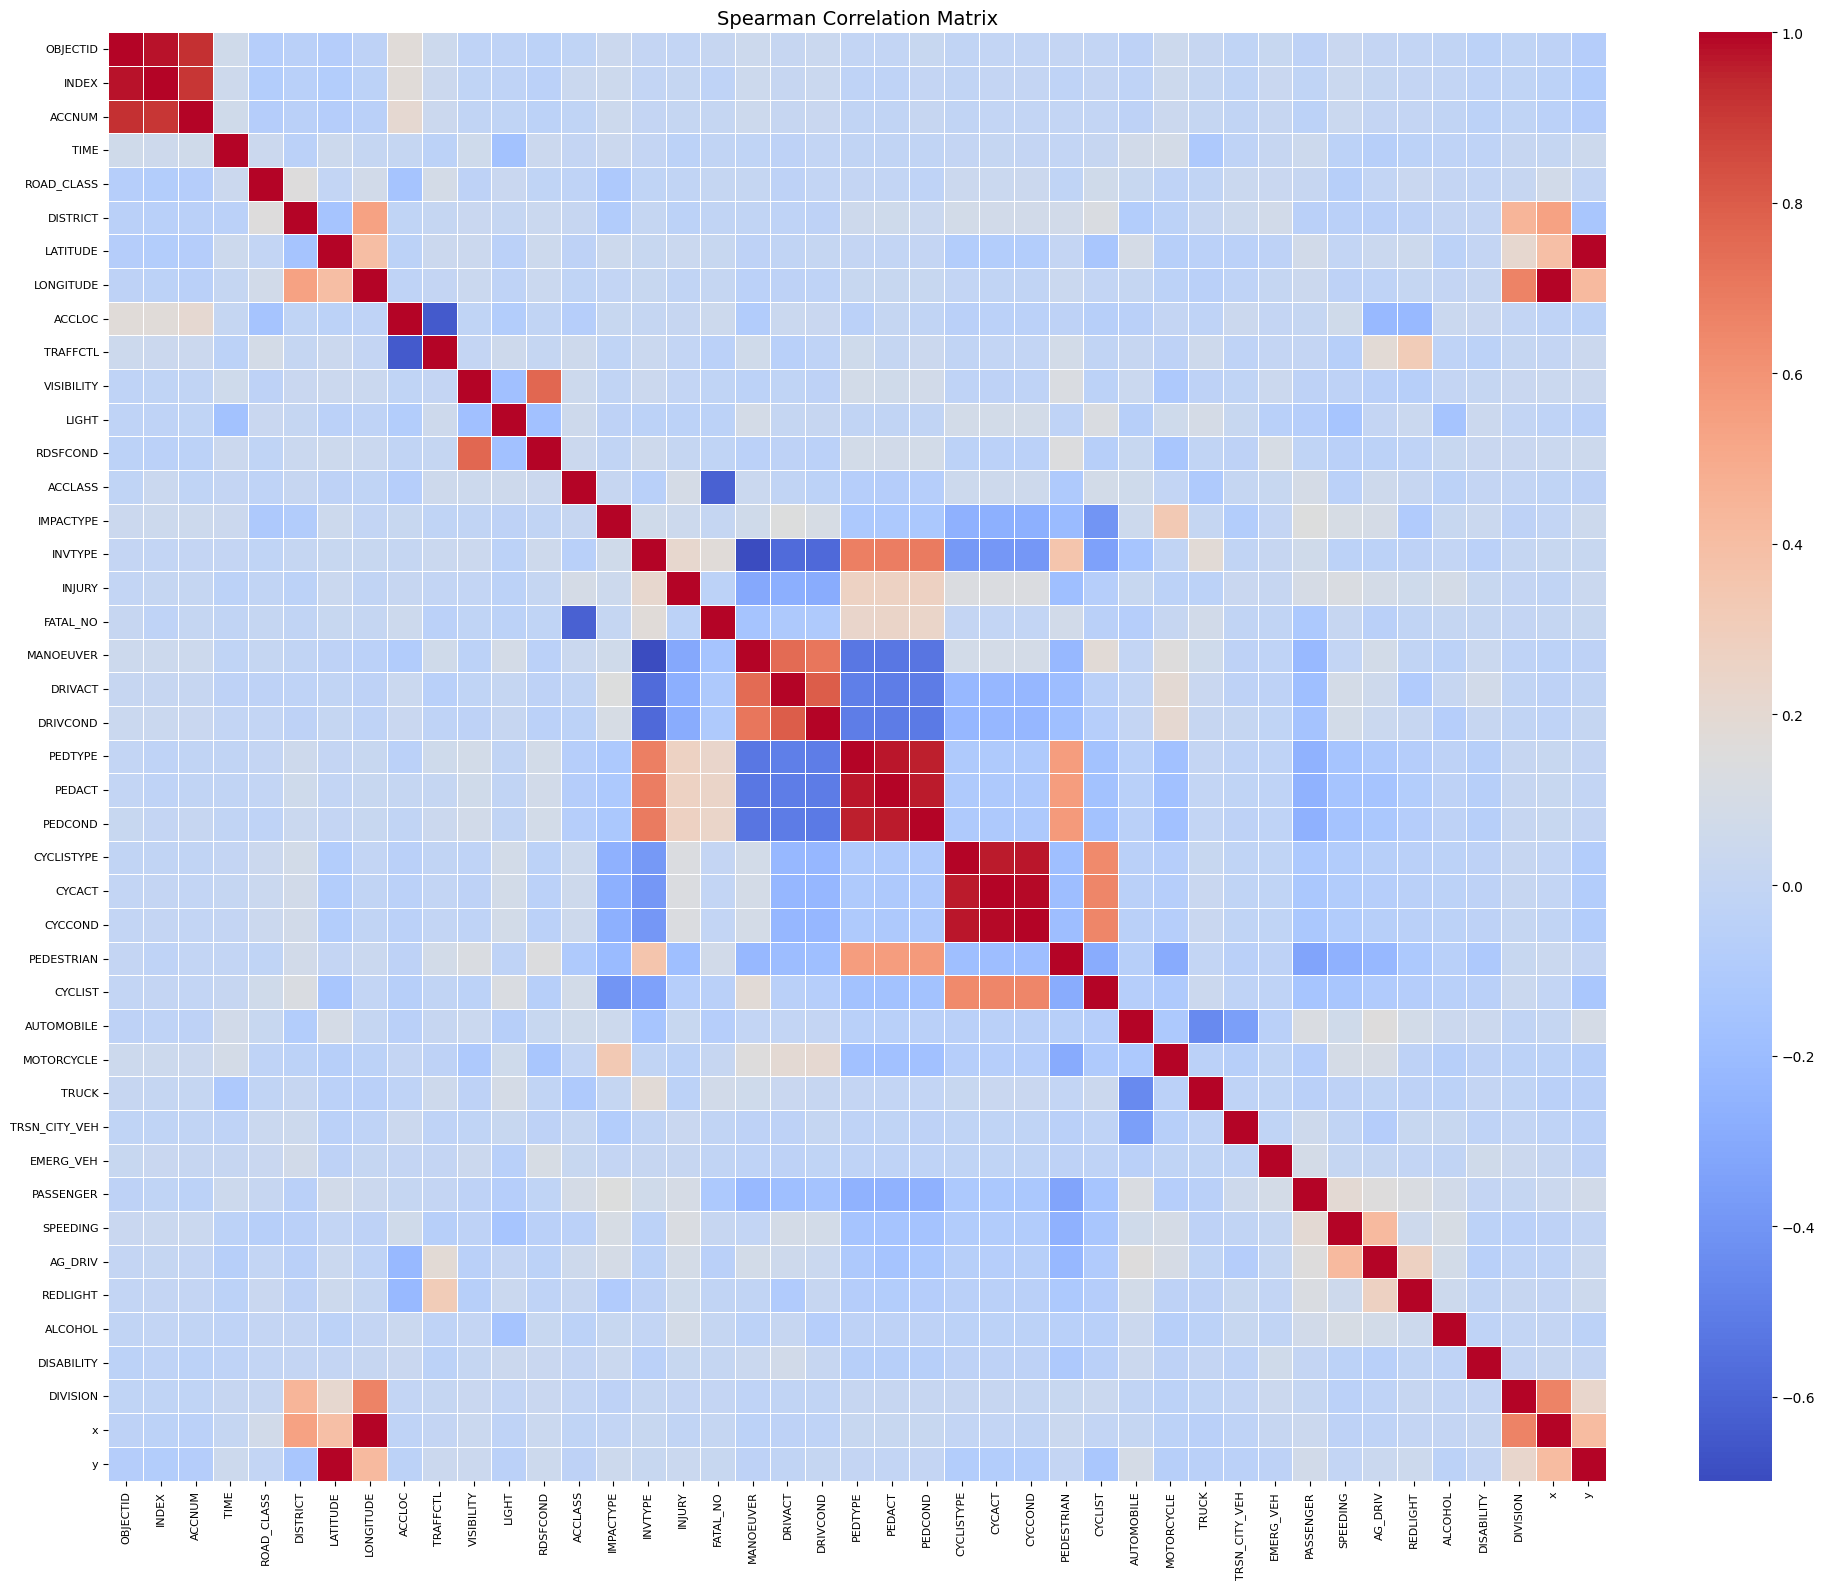

In [15]:
#Extract numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

#Computing Spearman correlation matrix
spearman_corr = data[numeric_cols].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

#Visualizing Spearman correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(spearman_corr, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)
plt.title("Spearman Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
print("Skew for normality")
print(data[numeric_cols].skew())  #Should be close to 0 for normality
print("Kurtosis for normality")
print(data[numeric_cols].kurtosis())  #Should be ~ 3 for normality

Skew for normality
OBJECTID          0.000000
INDEX            -0.334387
ACCNUM            1.109513
TIME             -0.568899
ROAD_CLASS       -0.997645
DISTRICT         -0.211059
LATITUDE          0.226495
LONGITUDE         0.095906
ACCLOC            0.419962
TRAFFCTL          0.095283
VISIBILITY        2.512568
LIGHT            -0.105829
RDSFCOND          1.848994
ACCLASS          -1.728162
IMPACTYPE         0.330302
INVTYPE           0.256792
INJURY            0.503383
FATAL_NO          4.851244
MANOEUVER         1.319761
DRIVACT           1.330528
DRIVCOND         -0.059657
PEDTYPE           2.335823
PEDACT            2.593430
PEDCOND           1.654920
CYCLISTYPE        5.549438
CYCACT            7.624622
CYCCOND           4.555300
PEDESTRIAN        0.294527
CYCLIST           2.582260
AUTOMOBILE       -2.696496
MOTORCYCLE        2.251266
TRUCK             3.780877
TRSN_CITY_VEH     3.747040
EMERG_VEH        12.856849
PASSENGER         0.425955
SPEEDING          1.766153
AG_DRIV  

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

#Copy and clean dataset
df = data.copy()

#Keep only valid ACCLASS values, removed Property Damage as focus is on Fatal vs Non-Fatal Collisions
df = df[df['ACCLASS'].isin([1, 2])]  # 1 = Fatal, 2 = Non-Fatal

#Drop potentially leaking, irrelevant, or duplicate columns
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')

#Encode categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

#Drop datetime columns if present
df = df.drop(columns=['DATE', 'TIME'], errors='ignore')

#Define features and target
X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train logistic regression model (multinomial)
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

#Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.12      0.19       181
           2       0.85      0.98      0.91       959

    accuracy                           0.84      1140
   macro avg       0.70      0.55      0.55      1140
weighted avg       0.80      0.84      0.80      1140

Confusion Matrix:
[[ 21 160]
 [ 18 941]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fatal', 'Non-Fatal'],
                yticklabels=['Fatal', 'Non-Fatal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


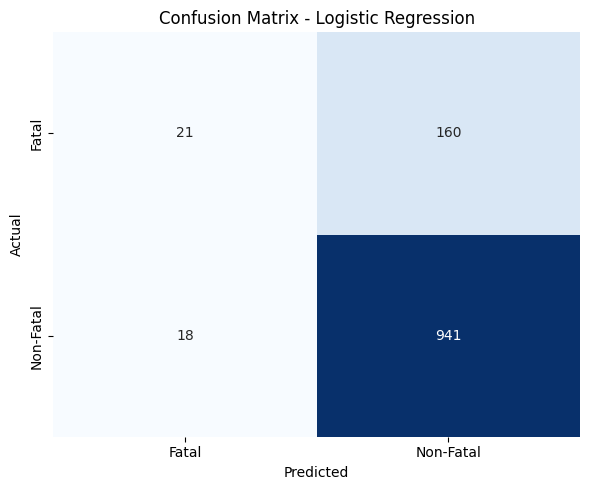

In [19]:
plot_conf_matrix(y_test, y_pred, model_name="Logistic Regression")

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = data.copy()
df = df[df['ACCLASS'].isin([1, 2])]
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.drop(columns=['DATE', 'TIME'], errors='ignore')

X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.61      0.65       181
           2       0.93      0.95      0.94       959

    accuracy                           0.89      1140
   macro avg       0.81      0.78      0.79      1140
weighted avg       0.89      0.89      0.89      1140

Confusion Matrix:
[[111  70]
 [ 50 909]]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fatal', 'Non-Fatal'],
                yticklabels=['Fatal', 'Non-Fatal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


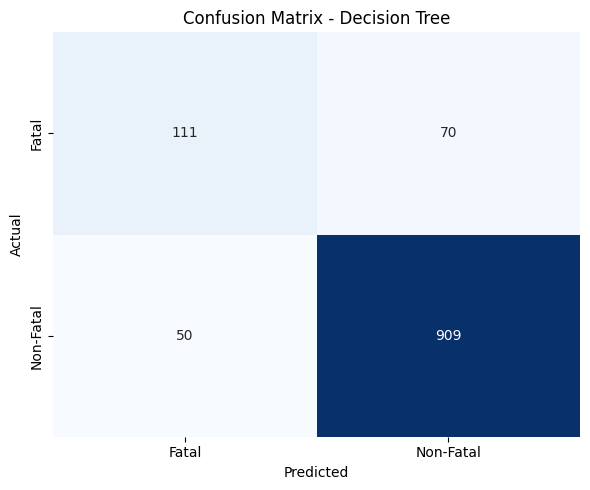

In [22]:
plot_conf_matrix(y_test, y_pred, model_name="Decision Tree")

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = data.copy()
df = df[df['ACCLASS'].isin([1, 2])]
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.drop(columns=['DATE', 'TIME'], errors='ignore')

X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.50      0.65       181
           2       0.91      0.99      0.95       959

    accuracy                           0.92      1140
   macro avg       0.93      0.75      0.80      1140
weighted avg       0.92      0.92      0.90      1140

Confusion Matrix:
[[ 91  90]
 [  6 953]]


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fatal', 'Non-Fatal'],
                yticklabels=['Fatal', 'Non-Fatal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


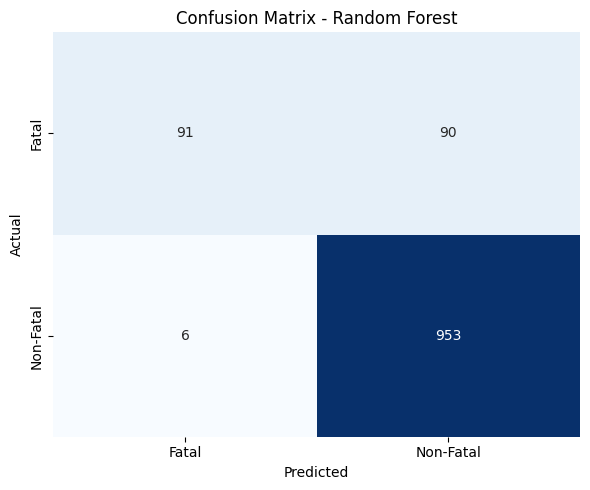

In [25]:
plot_conf_matrix(y_test, y_pred, model_name="Random Forest")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

Selected Features (Top 10):
Index(['OFFSET', 'ROAD_CLASS', 'ACCLOC', 'MANOEUVER', 'DRIVCOND', 'PEDESTRIAN',
       'CYCLIST', 'TRUCK', 'PASSENGER', 'SPEEDING'],
      dtype='object')
Logistic Regression (Selected Features) Report:
              precision    recall  f1-score   support

           1       0.60      0.10      0.17       181
           2       0.85      0.99      0.92       959

    accuracy                           0.85      1140
   macro avg       0.73      0.54      0.54      1140
weighted avg       0.81      0.85      0.80      1140



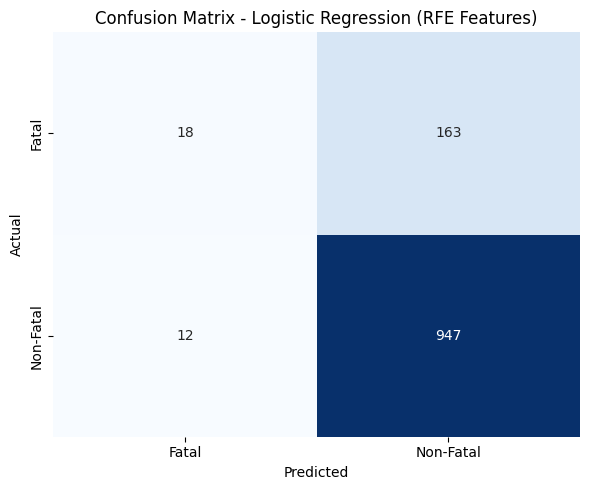

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = data.copy()
df = df[df['ACCLASS'].isin([1, 2])]
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.drop(columns=['DATE', 'TIME'], errors='ignore')

X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features (Top 10):")
print(selected_features)

X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

log_reg.fit(X_train_sel, y_train)
y_pred_sel = log_reg.predict(X_test_sel)

print("Logistic Regression (Selected Features) Report:")
print(classification_report(y_test, y_pred_sel))

plot_conf_matrix(y_test, y_pred_sel, model_name="Logistic Regression (RFE Features)")


Selected Features for Decision Tree:
Index(['STREET1', 'STREET2', 'OFFSET', 'LATITUDE', 'LONGITUDE', 'ACCLOC',
       'LIGHT', 'INVAGE', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140'],
      dtype='object')
Decision Tree Classification Report (RFE Features):
              precision    recall  f1-score   support

           1       0.82      0.77      0.79       181
           2       0.96      0.97      0.96       959

    accuracy                           0.94      1140
   macro avg       0.89      0.87      0.88      1140
weighted avg       0.94      0.94      0.94      1140



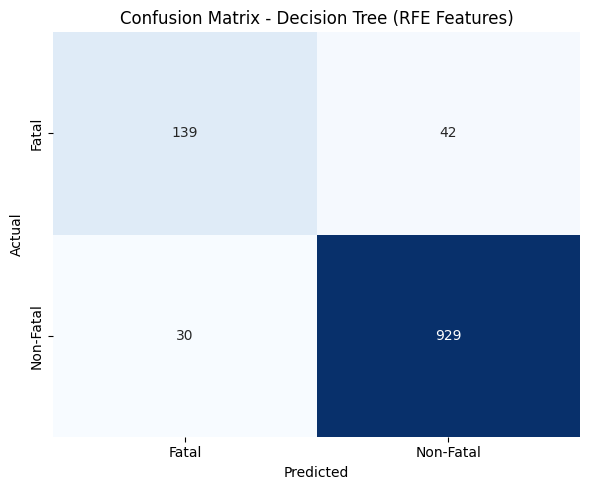

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = data.copy()
df = df[df['ACCLASS'].isin([1, 2])]
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.drop(columns=['DATE', 'TIME'], errors='ignore')

X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
rfe_dt = RFE(estimator=dt_model, n_features_to_select=10)
rfe_dt.fit(X_train_scaled, y_train)

selected_features_dt = X.columns[rfe_dt.support_]
print("Selected Features for Decision Tree:")
print(selected_features_dt)

X_train_sel = X_train_scaled[:, rfe_dt.support_]
X_test_sel = X_test_scaled[:, rfe_dt.support_]

dt_model.fit(X_train_sel, y_train)
y_pred_dt_sel = dt_model.predict(X_test_sel)

print("Decision Tree Classification Report (RFE Features):")
print(classification_report(y_test, y_pred_dt_sel))

plot_conf_matrix(y_test, y_pred_dt_sel, model_name="Decision Tree (RFE Features)")


Selected Features for Random Forest:
Index(['STREET1', 'STREET2', 'OFFSET', 'LATITUDE', 'LONGITUDE', 'ACCLOC',
       'IMPACTYPE', 'INVAGE', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140'],
      dtype='object')
Random Forest Classification Report (RFE Features):
              precision    recall  f1-score   support

           1       0.97      0.73      0.84       181
           2       0.95      1.00      0.97       959

    accuracy                           0.95      1140
   macro avg       0.96      0.87      0.90      1140
weighted avg       0.96      0.95      0.95      1140



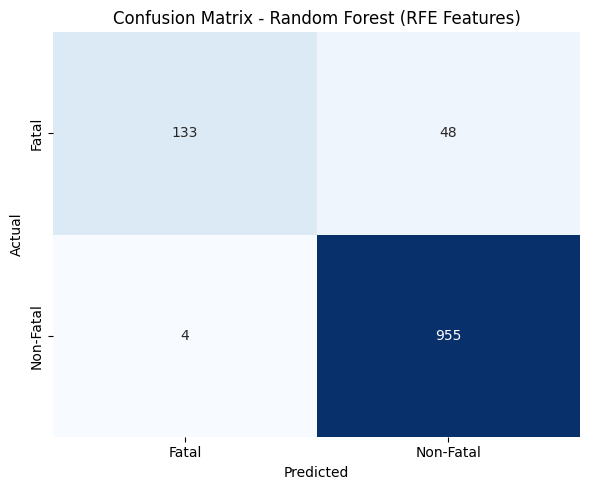

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


df = data.copy()
df = df[df['ACCLASS'].isin([1, 2])]
df = df.drop(columns=['FATAL_NO', 'INJURY', 'ACCLASS_BINARY', 'x', 'y','OBJECTID','INDEX','ACCNUM','HOOD_158','HOOD_140'], errors='ignore')


for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.drop(columns=['DATE', 'TIME'], errors='ignore')


X = df.drop(columns=['ACCLASS'])
y = df['ACCLASS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_rf = RFE(estimator=rf_model, n_features_to_select=10)
rfe_rf.fit(X_train_scaled, y_train)


selected_features_rf = X.columns[rfe_rf.support_]
print("Selected Features for Random Forest:")
print(selected_features_rf)

X_train_sel = X_train_scaled[:, rfe_rf.support_]
X_test_sel = X_test_scaled[:, rfe_rf.support_]

rf_model.fit(X_train_sel, y_train)
y_pred_rf_sel = rf_model.predict(X_test_sel)

print("Random Forest Classification Report (RFE Features):")
print(classification_report(y_test, y_pred_rf_sel))


plot_conf_matrix(y_test, y_pred_rf_sel, model_name="Random Forest (RFE Features)")


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

#Load Data
df = data.copy()

#Convert categorical features to numeric
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

#Convert 'DATE' & 'TIME' to numeric features
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df["Year"] = df["DATE"].dt.year
df["Month"] = df["DATE"].dt.month
df["Day"] = df["DATE"].dt.day
df["Weekday"] = df["DATE"].dt.weekday
df["Hour"] = pd.to_datetime(df["TIME"], errors="coerce").dt.hour

#Drop original datetime columns
df = df.drop(columns=["DATE", "TIME"], errors="ignore")

#Define Features (X) and Target (y)
X = df.drop(columns=["FATAL_NO"])  # Features
y = (df["FATAL_NO"] > 0).astype(int)  # Target (Binary)

#Check class distribution
print(df["FATAL_NO"].value_counts(normalize=True))

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



FATAL_NO
0.0     0.931806
11.0    0.001923
1.0     0.001224
2.0     0.001224
3.0     0.001224
          ...   
61.0    0.000525
62.0    0.000525
64.0    0.000350
65.0    0.000175
66.0    0.000175
Name: proportion, Length: 67, dtype: float64


In [30]:
from imblearn.over_sampling import SMOTE

#Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
 FATAL_NO
0    4263
1    4263
Name: count, dtype: int64


In [31]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1066
           1       0.79      0.82      0.81        78

    accuracy                           0.97      1144
   macro avg       0.89      0.90      0.90      1144
weighted avg       0.97      0.97      0.97      1144

ROC-AUC: 0.992134507143888


In [32]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]))

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0


In [33]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      0.96      0.98        78

    accuracy                           1.00      1144
   macro avg       1.00      0.98      0.99      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 0.9999999999999999


<ipython-input-34-c3e6f88482e6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="viridis")


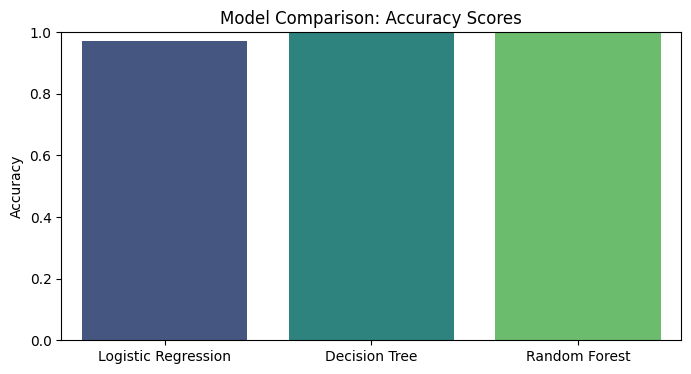

In [34]:
#Compare Models Using Accuracy Scores
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy_scores = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]

#Visualize and Compare Accuracy Scores
plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")
plt.title("Model Comparison: Accuracy Scores")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [35]:
#Feature Selection
from sklearn.feature_selection import RFE
df = data.copy()
#Convert categorical features to numeric
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype("category").cat.codes)

#Convert 'DATE' & 'TIME' to numeric features
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df["Year"] = df["DATE"].dt.year
df["Month"] = df["DATE"].dt.month
df["Day"] = df["DATE"].dt.day
df["Weekday"] = df["DATE"].dt.weekday
df["Hour"] = pd.to_datetime(df["TIME"], errors="coerce").dt.hour

#Drop original datetime columns
df = df.drop(columns=["DATE", "TIME"], errors="ignore")

#Define Features (X) and Target (y)
X = df.drop(columns=["FATAL_NO"])  # Features
y = (df["FATAL_NO"] > 0).astype(int)  # Target (Binary)

# Check class distribution
print(df["FATAL_NO"].value_counts(normalize=True))

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Standardize Data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


FATAL_NO
0.0     0.931806
11.0    0.001923
1.0     0.001224
2.0     0.001224
3.0     0.001224
          ...   
61.0    0.000525
62.0    0.000525
64.0    0.000350
65.0    0.000175
66.0    0.000175
Name: proportion, Length: 67, dtype: float64


In [36]:
#Filtered Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_scaled, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Logistic Regression:", selected_features)

#Train a New Logistic Regression Model with Selected Features
log_reg_selected = LogisticRegression(max_iter=1000)
log_reg_selected.fit(X_train_scaled[:, rfe.support_], y_train)
y_pred_log_selected = log_reg_selected.predict(X_test_scaled[:, rfe.support_])
print("Logistic Regression Results with Selected Features:")
print(classification_report(y_test, y_pred_log_selected))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_selected.predict_proba(X_test_scaled[:, rfe.support_])[:, 1]))


Selected Features for Logistic Regression: Index(['ACCLASS', 'INJURY', 'MANOEUVER', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'PASSENGER'],
      dtype='object')
Logistic Regression Results with Selected Features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1066
           1       0.78      0.79      0.79        78

    accuracy                           0.97      1144
   macro avg       0.88      0.89      0.89      1144
weighted avg       0.97      0.97      0.97      1144

ROC-AUC: 0.9920022129215376


In [37]:
#Filtered Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rfe = RFE(tree_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Decision Tree:", selected_features)

#Train a New Decision Tree Model with Selected Features
tree_model_selected = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_selected.fit(X_train[selected_features], y_train)
y_pred_tree_selected = tree_model_selected.predict(X_test[selected_features])
print("Decision Tree Results with Selected Features:")
print(classification_report(y_test, y_pred_tree_selected))
print("ROC-AUC:", roc_auc_score(y_test, tree_model_selected.predict_proba(X_test[selected_features])[:, 1]))


Selected Features for Decision Tree: Index(['OBJECTID', 'STREET2', 'ACCLASS', 'INJURY', 'INITDIR', 'y', 'Month',
       'Day', 'Weekday', 'Hour'],
      dtype='object')
Decision Tree Results with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0


In [38]:
#Filtered Random Forest
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfe = RFE(rand_forest, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Random Forest:", selected_features)

#Train a New Random Forest Model with Selected Features
rand_forest_selected = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rand_forest_selected.fit(X_train[selected_features], y_train)
y_pred_rf_selected = rand_forest_selected.predict(X_test[selected_features])
print("Random Forest Results with Selected Features:")
print(classification_report(y_test, y_pred_rf_selected))
print("ROC-AUC:", roc_auc_score(y_test, rand_forest_selected.predict_proba(X_test[selected_features])[:, 1]))


Selected Features for Random Forest: Index(['OBJECTID', 'INDEX', 'ACCLASS', 'INVTYPE', 'INVAGE', 'INJURY',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND'],
      dtype='object')
Random Forest Results with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0


In [39]:
#Trying Cross-Validation Method
from sklearn.model_selection import cross_val_score

#Classification Models with Cross-Validation
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

dt = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")
rf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Logistic Regression CV Accuracy: 0.9694 ± 0.0032
Decision Tree CV Accuracy: 0.9983 ± 0.0009
Random Forest CV Accuracy: 0.9963 ± 0.0011


In [40]:
print(y.value_counts(normalize=True))

FATAL_NO
0    0.931806
1    0.068194
Name: proportion, dtype: float64


In [41]:
#Predictive Analytics
#Convert date
data['DATE'] = pd.to_datetime(data['DATE'])

#Create 'Fatal Count' column (binary to numeric)
data['FATAL'] = data['FATAL_NO'].apply(lambda x: 1 if x > 0 else 0)

# Aggregate fatalities by month
monthly_data = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()

#Create features
monthly_data['Year'] = monthly_data['DATE'].dt.year
monthly_data['Month'] = monthly_data['DATE'].dt.month
#Useful for trend
monthly_data['TimeIndex'] = range(len(monthly_data))

<ipython-input-41-06b34f312347>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()


In [42]:
#Define X and y
X = monthly_data[['Year', 'Month', 'TimeIndex']]
y = monthly_data['FATAL']

#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [43]:
#Simple Predictive Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict & Evaluate
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 2.9717647058823533
RMSE: 3.7280021459221295


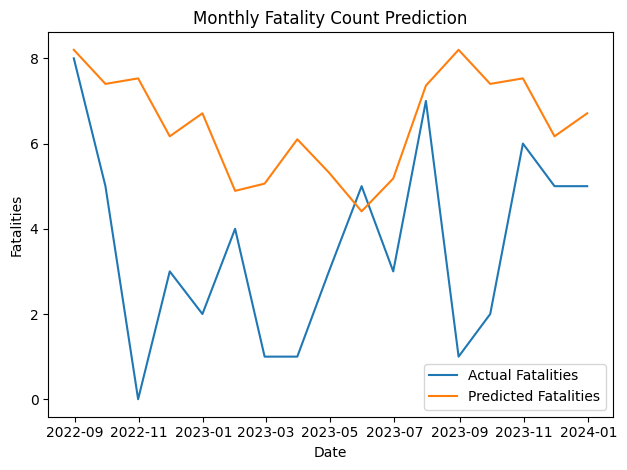

In [45]:
#Plot Predictions
import matplotlib.pyplot as plt

plt.plot(monthly_data['DATE'][-len(y_test):], y_test, label='Actual Fatalities')
plt.plot(monthly_data['DATE'][-len(y_test):], y_pred, label='Predicted Fatalities')
plt.title("Monthly Fatality Count Prediction")
plt.xlabel("Date")
plt.ylabel("Fatalities")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['FATAL'] = data['FATAL_NO'].apply(lambda x: 1 if x > 0 else 0)

monthly = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()
monthly['Year'] = monthly['DATE'].dt.year
monthly['Month'] = monthly['DATE'].dt.month
monthly['TimeIndex'] = range(len(monthly))  #Trend line


<ipython-input-46-8f584b98dccd>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()


In [47]:
from sklearn.ensemble import RandomForestRegressor

X = monthly[['Year', 'Month', 'TimeIndex']]
y = monthly['FATAL']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestRegressor(random_state=42)

In [48]:
#Forecasting Jan 2024 to Dec 2025 (24 months)
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'DATE': future_dates})
future_df['Year'] = future_df['DATE'].dt.year
future_df['Month'] = future_df['DATE'].dt.month
future_df['TimeIndex'] = range(len(monthly), len(monthly) + len(future_df))


In [49]:
X_future = future_df[['Year', 'Month', 'TimeIndex']]
future_df['Predicted_Fatalities'] = model.predict(X_future)


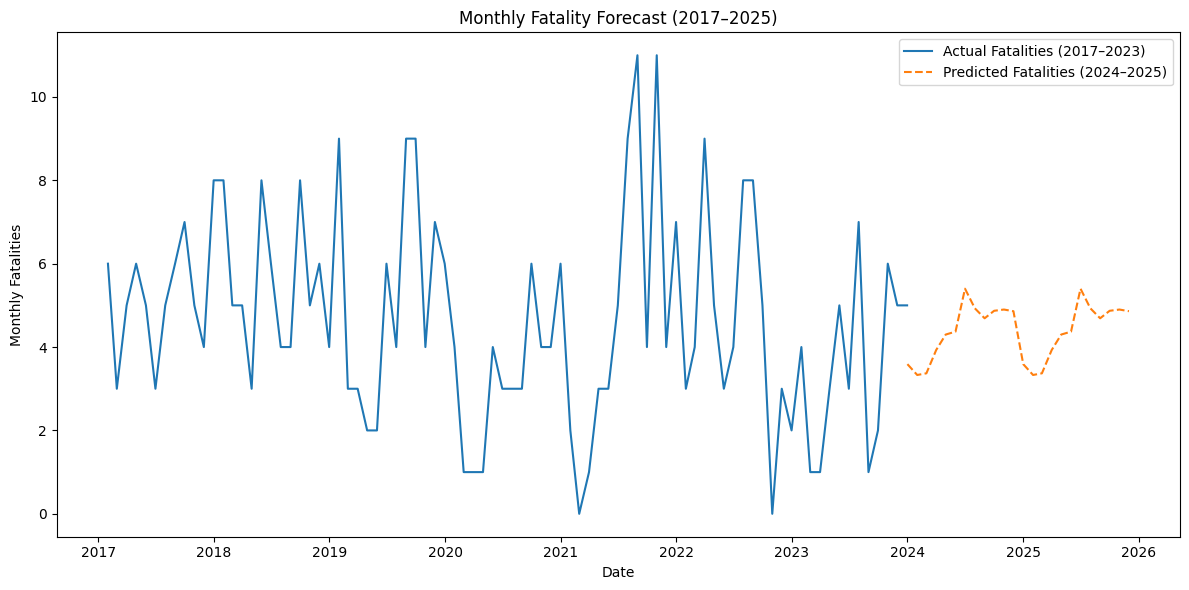

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly['DATE'], y, label='Actual Fatalities (2017–2023)')
plt.plot(future_df['DATE'], future_df['Predicted_Fatalities'], label='Predicted Fatalities (2024–2025)', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Monthly Fatalities")
plt.title("Monthly Fatality Forecast (2017–2025)")
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

data['DATE'] = pd.to_datetime(data['DATE'])
data['FATAL'] = data['FATAL_NO'].apply(lambda x: 1 if x > 0 else 0)

monthly = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()
monthly['Year'] = monthly['DATE'].dt.year
monthly['Month'] = monthly['DATE'].dt.month
monthly['TimeIndex'] = range(len(monthly))  #


<ipython-input-51-2dfb7500d9b5>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.groupby(pd.Grouper(key='DATE', freq='M'))['FATAL'].sum().reset_index()


In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Prepare data for Poisson
poisson_df = monthly.copy()
poisson_df['Intercept'] = 1
X_vars = ['Intercept', 'Year', 'Month', 'TimeIndex']

#Poisson model
poisson_model = sm.GLM(poisson_df['FATAL'], poisson_df[X_vars], family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  FATAL   No. Observations:                   84
Model:                            GLM   Df Residuals:                       81
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.79
Date:                Tue, 15 Apr 2025   Deviance:                       105.20
Time:                        13:56:23   Pearson chi2:                     102.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1375
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.404e-06   6.15e-07      3.910      0.0

In [53]:
#Build future months
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'DATE': future_dates})
future_df['Year'] = future_df['DATE'].dt.year
future_df['Month'] = future_df['DATE'].dt.month
future_df['TimeIndex'] = range(len(monthly), len(monthly) + len(future_df))
future_df['Intercept'] = 1

#Predict
X_future = future_df[['Intercept', 'Year', 'Month', 'TimeIndex']]
future_df['Predicted_Fatalities_Poisson'] = poisson_results.predict(X_future)


In [54]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

#Use time series index
ts = monthly.set_index('DATE')['FATAL']

#Fit ARIMA model
arima_model = ARIMA(ts, order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

#Forecast 24 future steps (months)
arima_forecast = arima_result.get_forecast(steps=24)
forecast_df = arima_forecast.summary_frame()
forecast_df['DATE'] = future_dates


                               SARIMAX Results                                
Dep. Variable:                  FATAL   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.195
Date:                Tue, 15 Apr 2025   AIC                            388.390
Time:                        13:56:27   BIC                            395.647
Sample:                    01-31-2017   HQIC                           391.306
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2852      0.106      2.682      0.007       0.077       0.494
ma.L1         -0.9860      0.082    -11.954      0.000      -1.148      -0.824
sigma2         5.6643      1.159      4.887      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


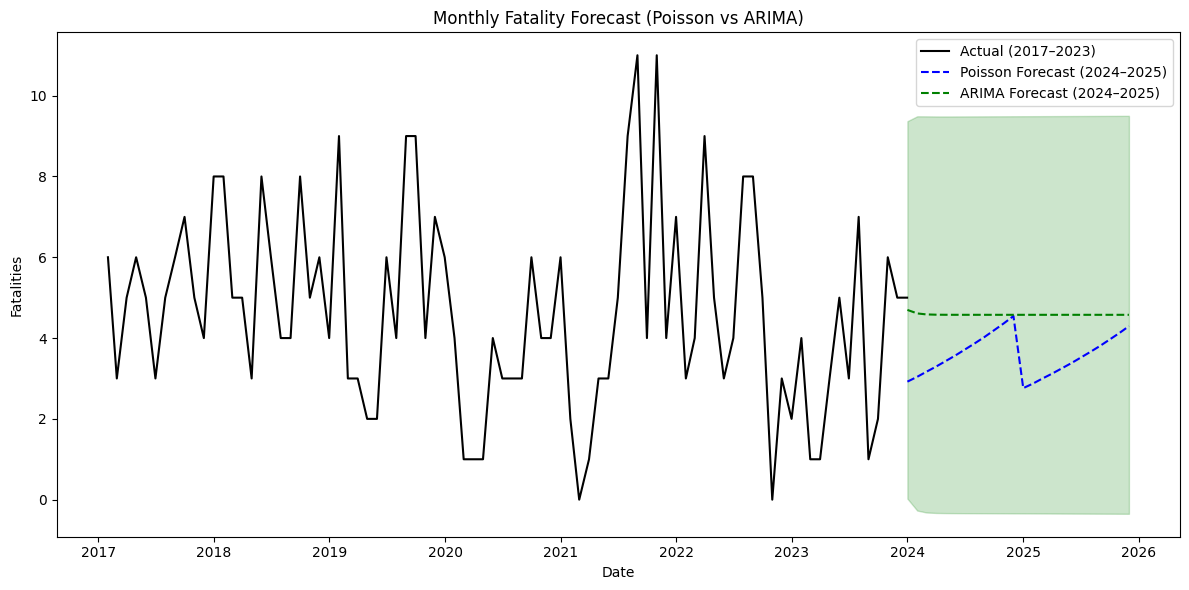

In [55]:
#Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(monthly['DATE'], monthly['FATAL'], label='Actual (2017–2023)', color='black')
plt.plot(future_df['DATE'], future_df['Predicted_Fatalities_Poisson'], label='Poisson Forecast (2024–2025)', linestyle='--', color='blue')
plt.plot(forecast_df['DATE'], forecast_df['mean'], label='ARIMA Forecast (2024–2025)', linestyle='--', color='green')
plt.fill_between(forecast_df['DATE'], forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='green', alpha=0.2)
plt.title("Monthly Fatality Forecast (Poisson vs ARIMA)")
plt.xlabel("Date")
plt.ylabel("Fatalities")
plt.legend()
plt.tight_layout()
plt.show()


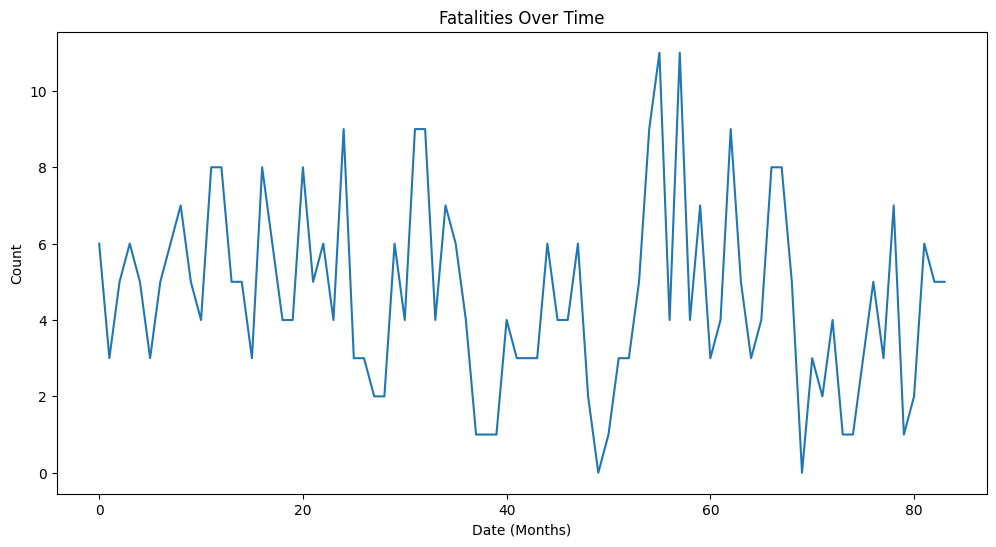

In [56]:
plt.figure(figsize=(12,6))
monthly['FATAL'].plot()
plt.title("Fatalities Over Time")
plt.xlabel("Date (Months)")
plt.ylabel("Count")
plt.show()


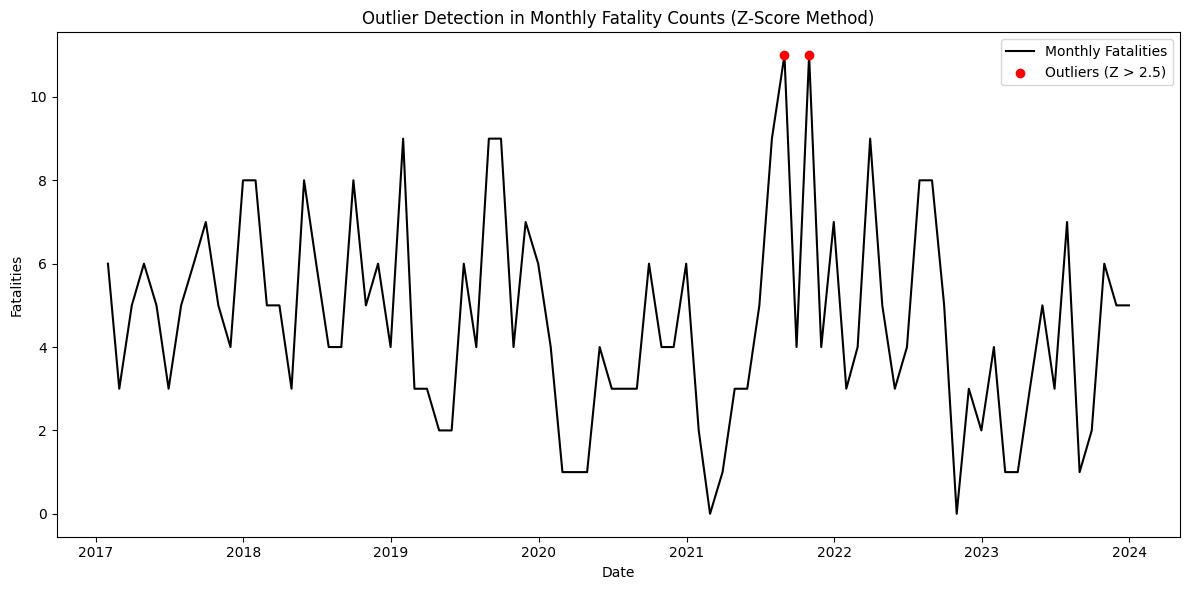

In [57]:
from scipy import stats

z_scores = stats.zscore(monthly['FATAL'])
monthly['Outlier'] = abs(z_scores) > 2.5

import matplotlib.pyplot as plt

#Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly['DATE'], monthly['FATAL'], label='Monthly Fatalities', color='black')
plt.scatter(
    monthly[monthly['Outlier']]['DATE'],
    monthly[monthly['Outlier']]['FATAL'],
    color='red',
    label='Outliers (Z > 2.5)',
    zorder=5
)
plt.title("Outlier Detection in Monthly Fatality Counts (Z-Score Method)")
plt.xlabel("Date")
plt.ylabel("Fatalities")
plt.legend()
plt.tight_layout()
plt.show()



In [58]:
from sklearn.ensemble import IsolationForest

#Drop non-numeric columns and scale
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['FATAL_NO'])
X_scaled = StandardScaler().fit_transform(X)

iso = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso.fit_predict(X_scaled)

df['Outlier'] = (outlier_labels == -1)

df[df['Outlier'] == True].head()



OBJECTID     INDEX  ACCNUM  STREET1  STREET2  OFFSET  ROAD_CLASS  \
45      13284  80631721     0.0      436     1150       0           6   
46      13285  80631859     0.0      436     1150       0           6   
48      13287  81070510     0.0      436     1150       0           6   
349     13588  80741779     0.0       30     1108       0           6   
401     13640  80771535     0.0      369       60      13           6   

     DISTRICT   LATITUDE  LONGITUDE  ...  NEIGHBOURHOOD_140  DIVISION  \
45          1  43.752017 -79.542331  ...                 55         6   
46          1  43.752017 -79.542331  ...                 55         6   
48          1  43.752017 -79.542331  ...                 55         6   
349         4  43.635432 -79.441371  ...                110         3   
401         4  43.674872 -79.395358  ...                  3        14   

               x            y  Year  Month  Day  Weekday  Hour  Outlier  
45   617353.8311  4845362.011  2017      1   25        2     0     True  
46   617353.8311  4845362.011  2017      1   25        2     0     True  
48   617353.8311  4845362.011  2017      1   25        2     0     True  
349  625725.3592  4832561.633  2017      5   24        2     0     True  
401  629352.2852  4837012.686  2017      6    8        3     0     True  

[5 rows x 58 columns]

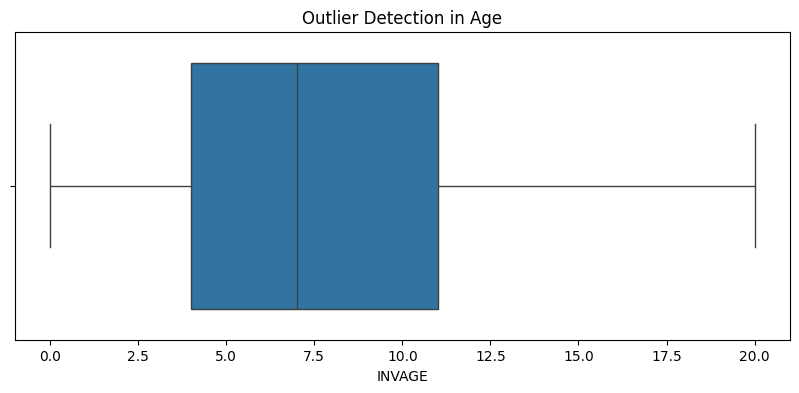

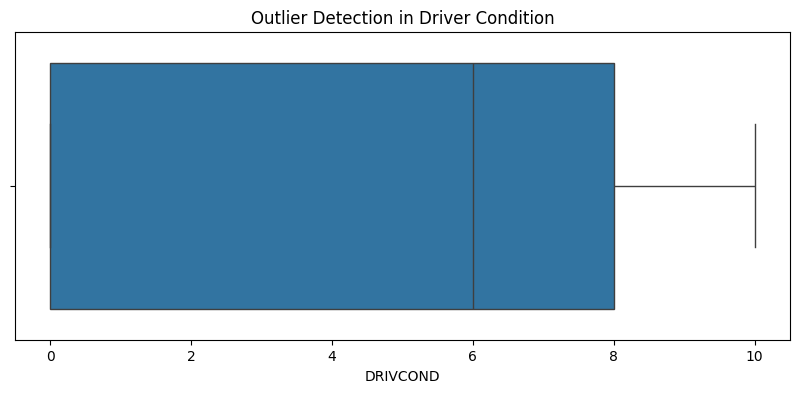

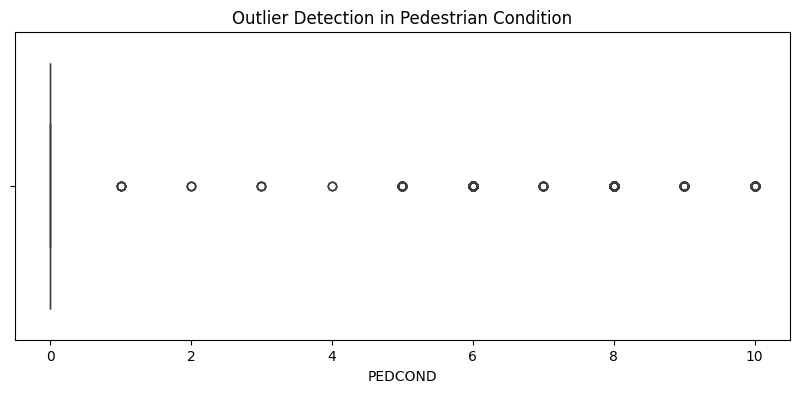

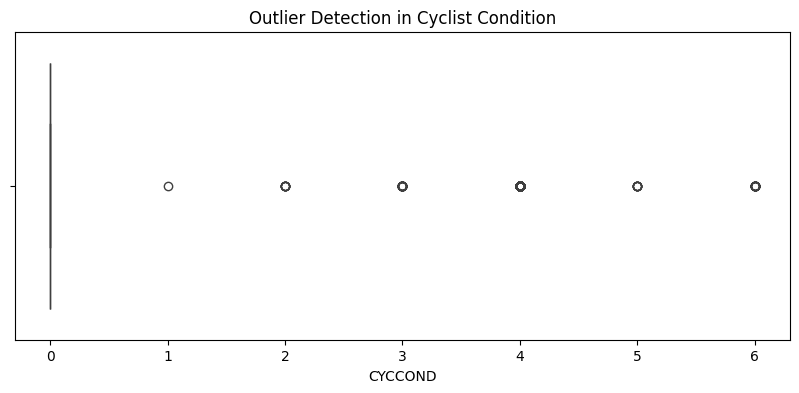

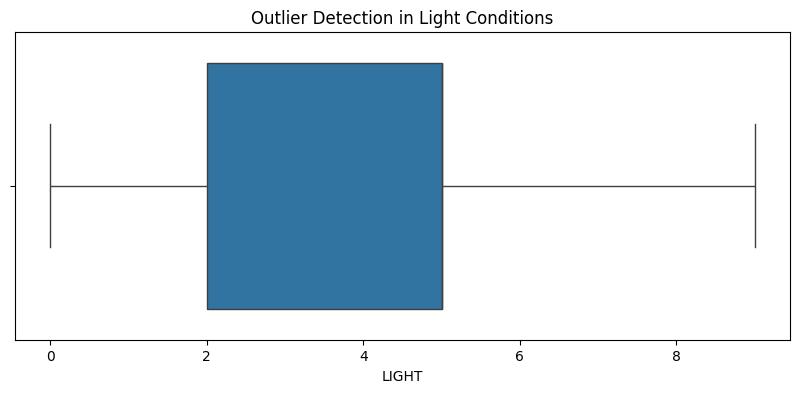

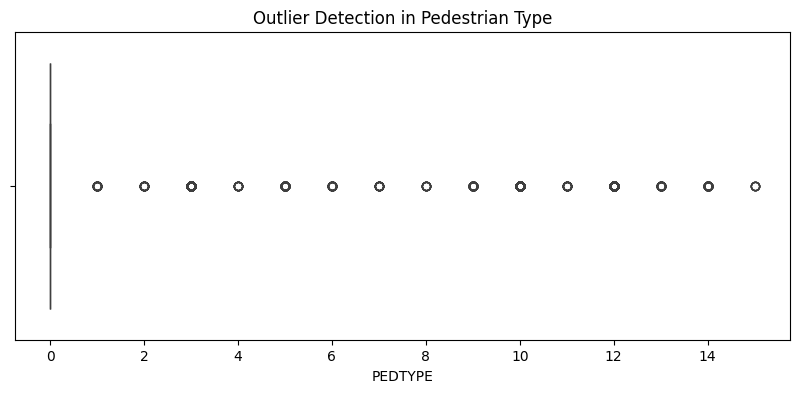

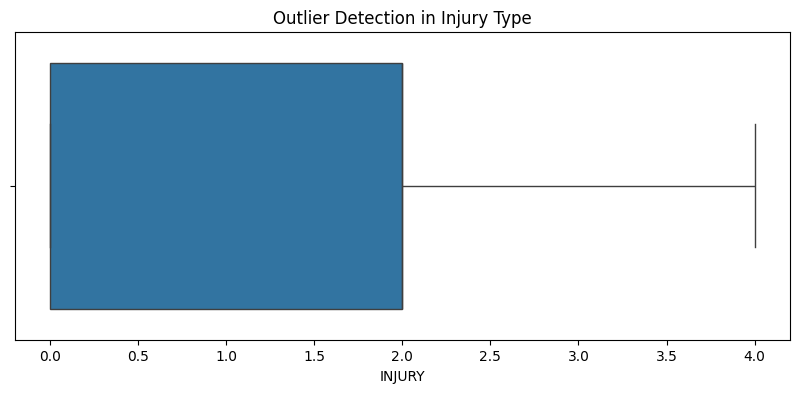

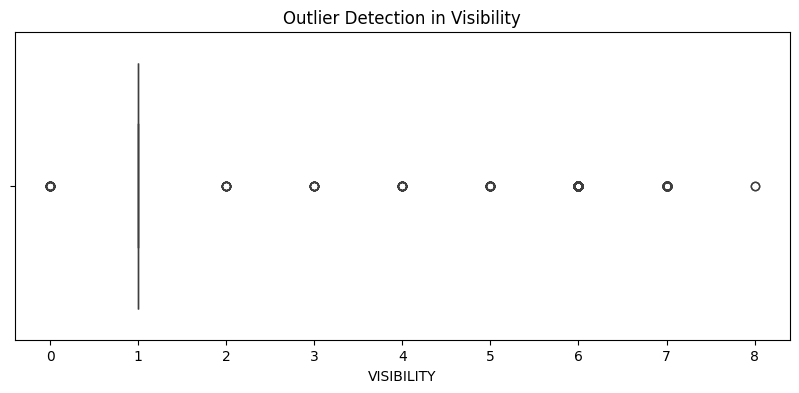

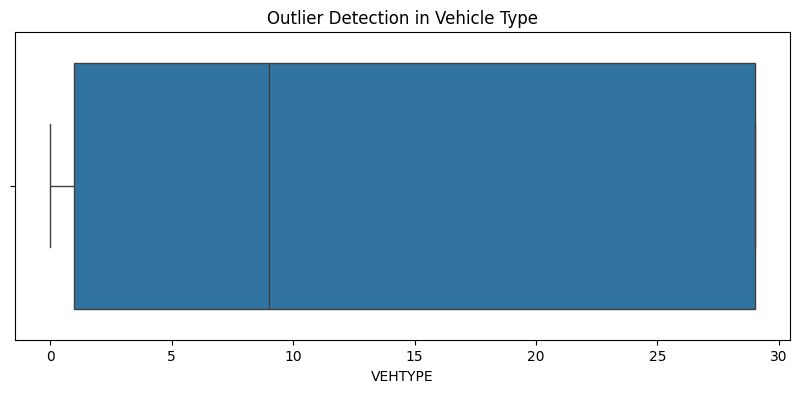

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='INVAGE')
plt.title("Outlier Detection in Age")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='DRIVCOND')
plt.title("Outlier Detection in Driver Condition")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='PEDCOND')
plt.title("Outlier Detection in Pedestrian Condition")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='CYCCOND')
plt.title("Outlier Detection in Cyclist Condition")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='LIGHT')
plt.title("Outlier Detection in Light Conditions")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='PEDTYPE')
plt.title("Outlier Detection in Pedestrian Type")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='INJURY')
plt.title("Outlier Detection in Injury Type")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='VISIBILITY')
plt.title("Outlier Detection in Visibility")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='VEHTYPE')
plt.title("Outlier Detection in Vehicle Type")
plt.show()

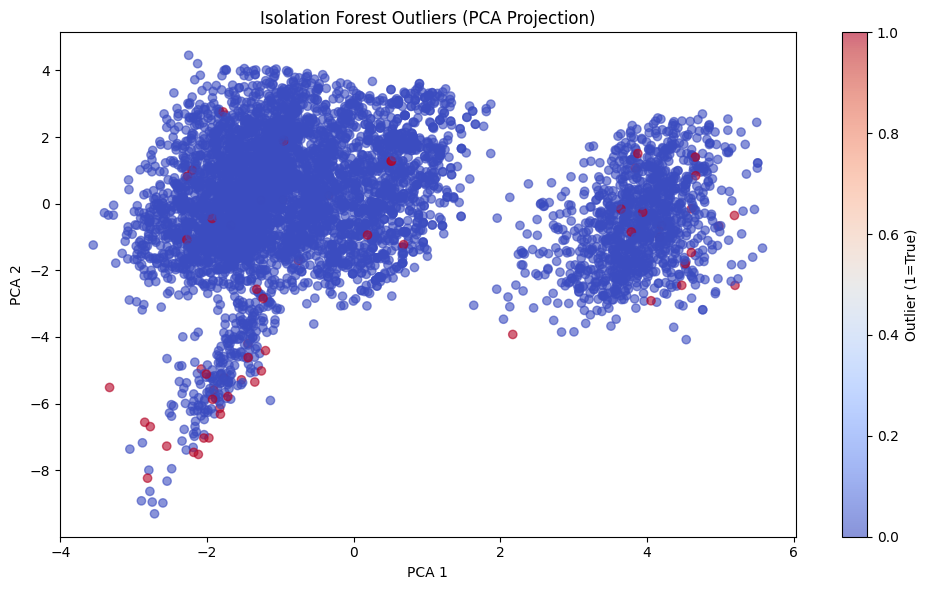

In [60]:
from sklearn.decomposition import PCA

#Reduce to 2D for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=(df['Outlier'] == True), cmap='coolwarm', alpha=0.6)
plt.title("Isolation Forest Outliers (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Outlier (1=True)')
plt.tight_layout()
plt.show()




In [61]:
#View how much each original feature contributes to the first 2 components
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PCA 1', 'PCA 2'])
print(components_df.T.sort_values(by='PCA 1', ascending=False).head())


               PCA 1     PCA 2
PEDCOND     0.409940 -0.074885
PEDACT      0.371074 -0.073285
INVTYPE     0.368450  0.005031
PEDTYPE     0.367523 -0.061753
PEDESTRIAN  0.284116 -0.000163
